# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**  Md Merajuddin


# **Project Summary -**

Share market is simply the market place where multiple traders and investors buy and sell shares of different companies. The primary crux of share market is that people try to buy share in a lower prce and sell it when the price increases, thus marking a profit. Reason to use ML in share price prediction: Since the existence of share market, the share price analysis have always been predicted by humans, manually. They used different techniques which included many mathematical and economics formulae, etc. which required a lot of human calculation, thus have human limitation. Thus, as the computation capacity of computers have increased and high piwer ML algorithms are available, it's often better to take help of ML models in predicting the price of share and identify pattern.

In the data set I recieved, I have features of open, high, low and close, where I had to find a pattern to predict the close using open, high and low.

I started my analysis with EDA, where I found how exactly the data was distributed. Independent parameters were skewed, so I adjusted them with log transformation. I also made plots to see how the dependent variable was varying with different independent variables.

I also made a dataframe for VIF score, even when the vif was high, I decided not to drop any feature to see the accuracy I get. (Note: I later decided not to drop any feature finally as I am getting a high accuracy).

I started building the models, I used LR, Ridge and Lasso and also XGBRegression. I got the highest accuracy in XGBRegression with least mean squared error. Thus, I am selecting XGBRegression as my final model with 0.991 Rsquare.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import all the important Libraries
import numpy as np                    # numerical computations
import pandas as pd                   # data analyze

import matplotlib.pyplot as plt       # data visualization
import seaborn as sns
%matplotlib inline

from datetime import datetime         # To play with datetime object

from numpy import math
import missingno as msno
import datetime as dt

from scipy.stats import uniform                      # For hypothesis testing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split       # train-test-split
from sklearn.linear_model import LinearRegression          # Linear Regression model
from sklearn.metrics import r2_score                       # evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge                      # fit data into ridge regression
from sklearn.linear_model import Lasso                       # fit data into lasso regression
from sklearn.linear_model import ElasticNet                   #fitting data into Elastic Net
from xgboost import XGBRegressor                               # fitting the data into XGBoost Regressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV            # Importing GridSearch

from scipy.stats import zscore                      #  data transformation

import warnings                            # Ignore warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
# Let's get the first 7 rows of our dataset
df.head(7)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33


In [7]:
# Let's get the last 7 rows of our dataset
df.tail(7)

,Date,Open,High,Low,Close
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(f' The shape of our dataset is {df.shape}')

 The shape of our dataset is (185, 5)


In [9]:
# Let's get the count of no. ofrows and columns of our dataset
print(f'The  number of rows in our dataset is {df.shape[0]}')
print(f'The  number of columns in our dataset is {df.shape[1]}')

The  number of rows in our dataset is 185
The  number of columns in our dataset is 5


### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are multiple variable in the dataset - Date, Open, High and close.

The columns Open and Close represent the starting and final price.

The High, Low variable are represent the maximum and minimum.

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

In [12]:
# Let's get the sum of duplicate values present in our dataset
duplicate_values=df.duplicated().sum()
print( f'The duplicate values present in our dataset is {duplicate_values}')

The duplicate values present in our dataset is 0


As we can see there are no duplicates values present in our dataset.

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
missing_values=df.isnull().sum()
print( f'The missing values present in our dataset is {missing_values}')

The missing values present in our dataset is Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


As we can see there are missin/null values present in our dataset.

Text(0.5, 1.0, 'Visualizing the missing values')

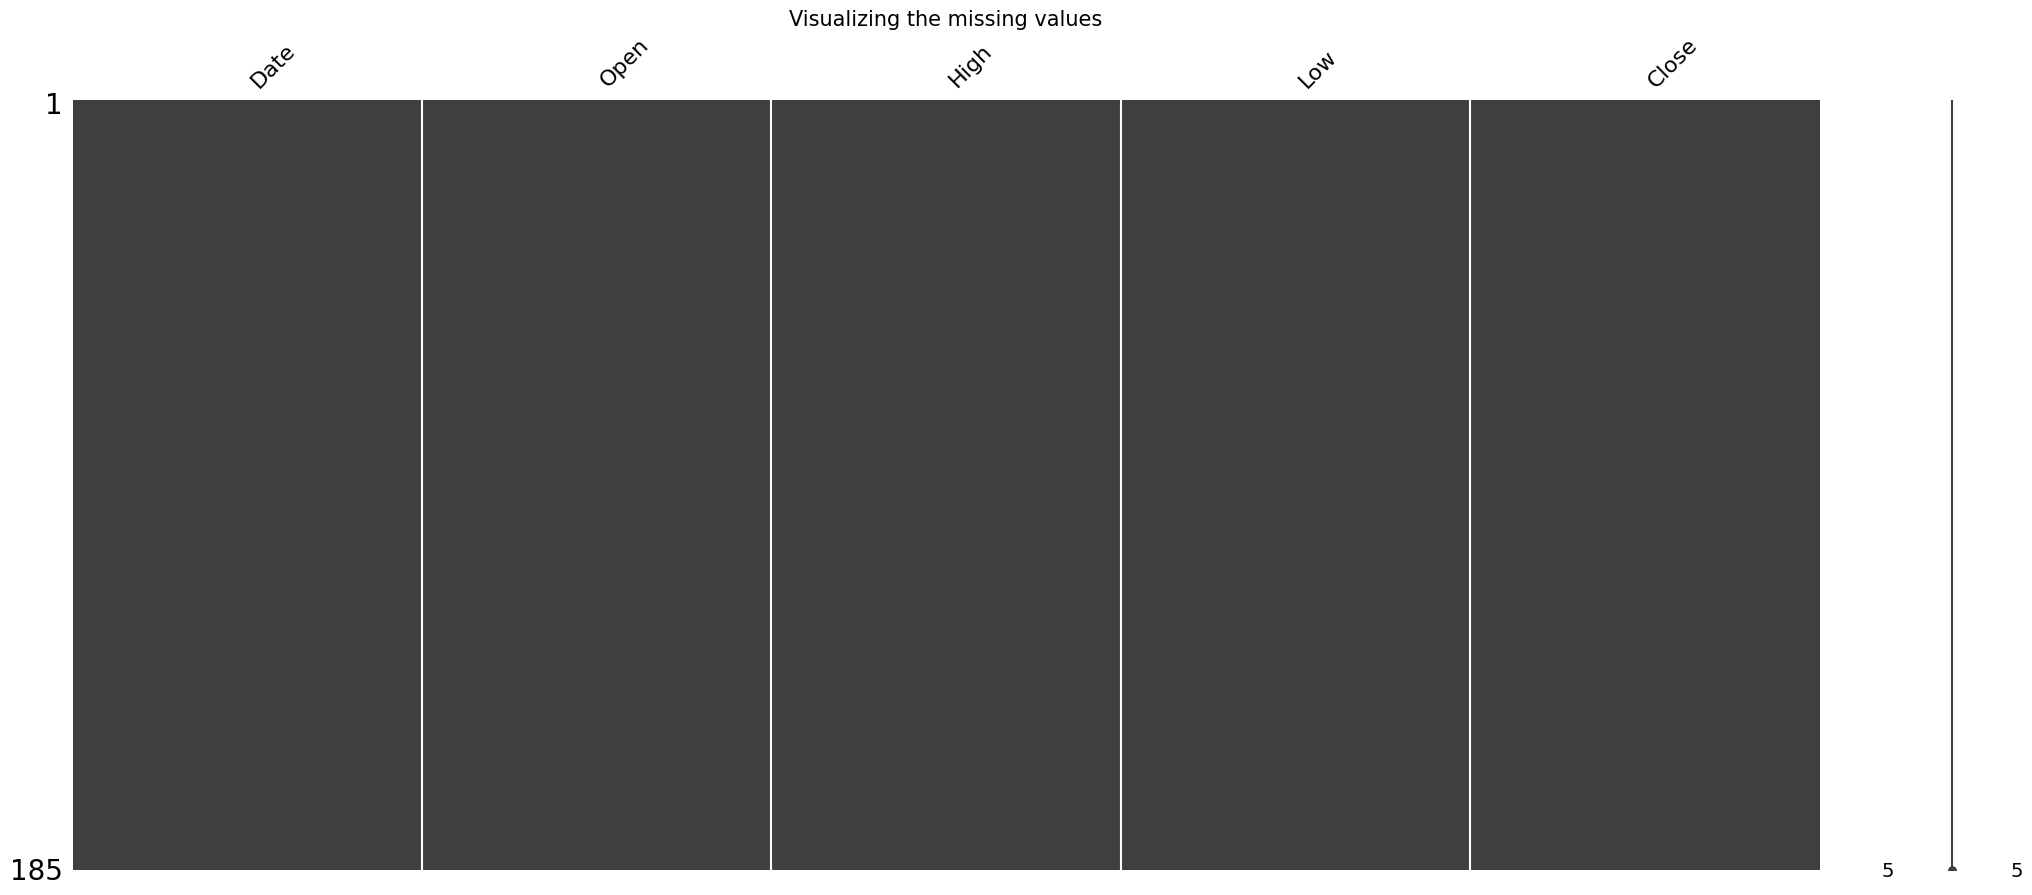

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting matrix plot
msno.matrix(df)
plt.title('Visualizing the missing values', fontsize = 15)


From the above matrix plot visualization it is clearly shown that we don't have any duplicate or null values present in our dataset.

### What did you know about your dataset?

There are 185 rows and 5 columns in the dataset.

No duplicate rows.

No missing values in the dataset.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [16]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

Date : Date of record.

Open : Opening price.

High : Highest price in the month.

Low : Lowest price in the month.

Close : Closing price.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("unique value count in",i,"is",df[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185


## 3. ***Data Wrangling***

Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

As we alreay seen above that we don't have any missing and duplicate values present in our dataset. So, now we will convert string object to datetime object.

### Data Wrangling Code

In [18]:
# Let's check the datatypes of all the columns
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

Since, Date column has dtype as object we've to convert it into datetime format

In [19]:
df['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.

In [20]:
# Write your code to make your dataset analysis ready.
# Let's convert 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))


In [21]:
df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [22]:
#check dtype of date now
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Let's extract year,quarter,month from our date  columns for doing further analysis

### Checking the Outlier

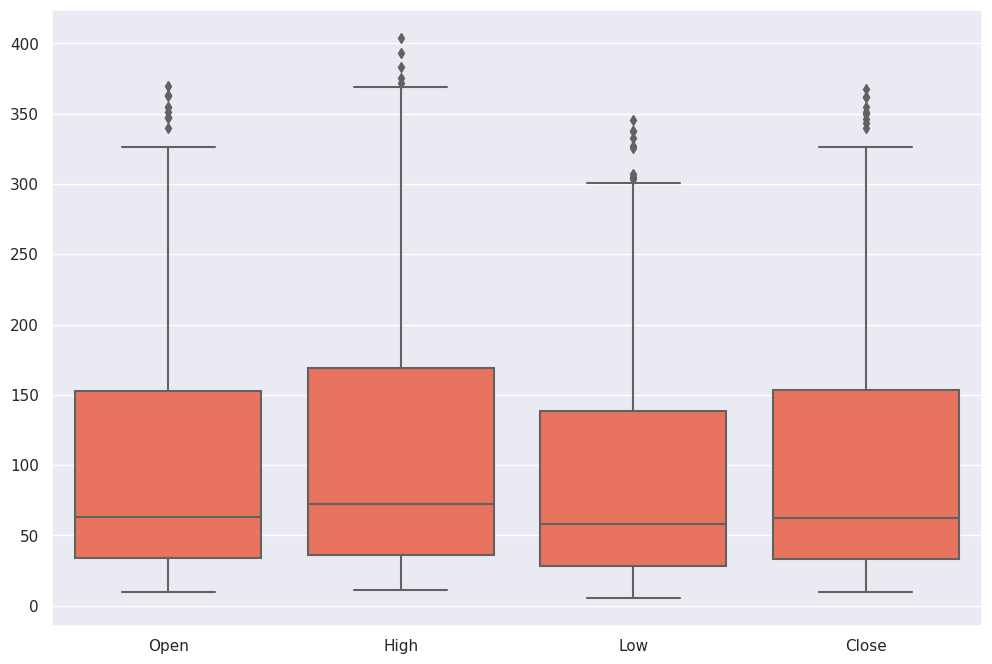

In [23]:
# check for outliers
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.boxplot(data=df, orient="v",color="tomato")

According to the above box-plots, there are some outliers in the dataset.

However we need to check if these are really outliers or possible correct values.

All columns have sort of same outliers value range which is above 300.

In [24]:
#Let's create a function to find outliers using IQR
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers=df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [25]:
for i in ['Open','High','Low','Close']:
  outliers=find_outliers_IQR(df[i])
  outliers_percent=round(((outliers.size)/(df[i].size)*100),2)
  print(f'Outliers in {i} : {outliers_percent}%')

Outliers in Open : 4.86%
Outliers in High : 2.7%
Outliers in Low : 4.86%
Outliers in Close : 4.86%


In [26]:
for i in ['Open','High','Low','Close']:
  outliers=find_outliers_IQR(df[i])
  print(f'{i} :')
  print(outliers)

Open :
145    363.00
146    351.00
147    354.60
151    355.00
154    362.85
155    348.00
156    340.00
157    369.95
158    347.20
Name: Open, dtype: float64
High :
144    372.00
146    383.25
147    375.75
156    393.35
157    404.00
Name: High, dtype: float64
Low :
145    337.37
146    345.50
150    307.35
151    304.65
153    303.30
154    325.70
155    327.35
156    332.45
157    338.00
Name: Low, dtype: float64
Close :
144    361.96
145    351.15
146    350.00
150    354.45
153    362.05
154    346.20
155    339.60
156    367.90
157    343.40
Name: Close, dtype: float64


It seems like all the outliers are from row index 144 to 157

In [27]:
# analyze outliers
df[144:158]

,Date,Open,High,Low,Close
144,2017-07-01,293.04,372.00,290.78,361.96
145,2017-08-01,363.00,368.52,337.37,351.15
146,2017-09-01,351.00,383.25,345.50,350.00
147,2017-10-01,354.60,375.75,299.00,314.35
148,2017-11-01,315.50,329.80,296.00,306.80
149,2017-12-01,307.20,319.00,300.65,315.05
150,2018-01-01,314.00,366.00,307.35,354.45
151,2018-02-01,355.00,366.50,304.65,322.25
152,2018-03-01,320.70,325.80,285.10,304.90
153,2018-04-01,305.00,368.75,303.30,362.05


From the above boxplots it seems like there are some outliers in the dataset.
But when we calculated the percentage we found that one 'High' column has more than 2.5 percent and all the other 3 columns have almost same which is 4.86 percent outliers and we can't consider more than 2 and 4 perecent of data as outliers blindly.

We know that these are stock prices, and all the outliers in all 4 columns are almost similar which is more than 300.

From all the above points we can say that these are not outliers , these are possible values. We also cross checked the prices on google of 'Yes Bank stock' in 2017 and 2018 as the outliers data belongs to these years.

### Minimum, Maximum and Average of stock prices Year wise

In [28]:
df.groupby(df['Date'].dt.year).aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                        High                         Low          \
         min     max        mean     min     max        mean     min     max   
Date                                                                           
2005   12.58   13.49   13.183333   13.88   14.88   14.423333   11.25   13.00   
2006   13.68   25.40   18.401667   16.97   29.66   21.090833   13.40   24.40   
2007   27.00   46.40   35.160833   31.58   54.00   39.743333   23.31   45.00   
2008   12.40   50.88   31.292500   16.56   55.56   34.330833   11.01   44.40   
2009   10.00   50.98   26.940833   11.24   55.67   32.678333    8.16   48.60   
2010   47.80   72.20   57.946667   51.48   77.60   63.508333   44.60   68.21   
2011   51.84   63.00   58.865000   57.69   68.26   63.341667   46.71   61.36   
2012   47.92   89.20   70.648333   66.50   95.00   77.577500   46.11   88.01   
2013   49.20  104.41   82.608333   67.81  109.43   92.748333   43.22   97.20   
2014   60.52  142.08  100.463333   62.70  155.00  112.439167   58.42  134.00   
2015  135.61  177.00  161.141667  154.52  182.00  169.394167  118.00  158.90   
2016  138.80  273.30  207.124167  149.90  290.00  224.225833  126.45  245.80   
2017  231.98  363.00  309.131667  284.31  383.25  333.800833  226.30  345.50   
2018  174.00  369.95  300.725000  194.30  404.00  331.920833  147.00  338.00   
2019   42.00  277.00  137.000000   70.50  285.90  155.858333   29.05  228.80   
2020   12.00   46.90   25.150909   14.01   87.95   32.805455    5.55   36.55   

                   Close                      
            mean     min     max        mean  
Date                                          
2005   12.391667   12.46   13.71   13.215000  
2006   16.903333   15.33   26.97   19.350000  
2007   31.830000   28.14   49.81   36.873333  
2008   23.335000   12.26   50.54   28.252500  
2009   24.275833    9.98   53.41   30.032500  
2010   53.880833   47.32   71.86   58.645833  
2011   52.275833   47.72   62.90   57.223333  
2012   67.428333   65.97   92.84   74.281667  
2013   72.990833   48.65  104.41   80.585000  
2014   94.627500   60.95  154.57  106.947500  
2015  146.293333  137.90  176.52  160.112500  
2016  193.472500  137.67  272.56  213.524167  
2017  292.530833  279.10  361.96  315.306667  
2018  263.820833  169.65  367.90  288.637500  
2019  106.687500   41.45  275.05  125.262500  
2020   18.797273   11.95   39.20   22.105455

In year 2017 and 18 prices were the highest.

In year 2005 prices were the lowest.

In 2020 there is sudden decline in price from 2019 because of the Covid-19 pandemic.

### Minimum, Maximum and Average of stock prices Month wise

In [29]:
df.groupby(df['Date'].dt.month).aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
        min     max        mean    min     max        mean    min     max   
Date                                                                        
1     13.68  314.00  100.928000  17.16  366.00  117.346667  11.48  307.35   
2     12.19  355.00  109.134667  12.50  366.50  116.035333   9.90  304.65   
3     10.00  320.70  108.150667  11.24  325.80  123.670667   5.55  285.10   
4     10.04  309.60  113.044000  17.51  368.75  125.709333   9.94  303.30   
5     15.94  362.85  114.589333  21.80  364.40  122.090000  14.76  325.70   
6     18.20  348.00  113.268000  18.40  350.10  118.471333  13.40  327.35   
7     13.00  340.00  103.891250  14.00  393.35  117.493750  11.10  332.45   
8     12.00  369.95  108.481875  14.88  404.00  116.064375  11.85  338.00   
9     13.48  351.00  103.691875  14.87  383.25  114.283750  12.27  345.50   
10    13.20  354.60   93.815625  14.01  375.75  109.928125  11.01  299.00   
11    12.41  315.50   97.975000  13.88  329.80  105.645000  11.25  296.00   
12    12.40  307.20  100.850000  14.44  319.00  107.654000  11.13  300.65   

                  Close                      
            mean    min     max        mean  
Date                                         
1      93.766000  12.24  354.45  108.774667  
2      98.238667  10.26  322.25  107.760667  
3      98.524000   9.98  309.82  113.014000  
4     102.284667  15.45  362.05  114.450000  
5     102.404667  18.03  346.20  112.874667  
6     102.642000  15.62  339.60  109.661333  
7      96.206250  11.95  367.90  108.322500  
8      95.777500  13.42  351.15  103.386875  
9      85.735625  13.15  350.00   93.343750  
10     85.361875  12.42  314.35   97.399375  
11     87.251875  12.26  306.80   94.671250  
12     92.808000  13.71  315.05  100.724000

Mean prices are little low in month of october and november as compared to other months.

### Minimum, Maximum and Average of stock prices Quarter wise

In [30]:
df.groupby(df['Date'].dt.quarter).aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
        min     max        mean    min     max        mean    min     max   
Date                                                                        
1     10.00  355.00  106.071111  11.24  366.50  119.017556   5.55  307.35   
2     10.04  362.85  113.633778  17.51  368.75  122.090222   9.94  327.35   
3     12.00  369.95  105.355000  14.00  404.00  115.947292  11.10  345.50   
4     12.40  354.60   97.476596  13.88  375.75  107.744255  11.01  300.65   

                  Close                      
            mean    min     max        mean  
Date                                         
1      96.842889   9.98  354.45  109.849778  
2     102.443778  15.45  362.05  112.328667  
3      92.573125  11.95  367.90  101.684375  
4      88.381702  12.26  315.05   97.531702

In Quarter 3 prices were the highest.

In Quarter 4 prices were the lowest.

### What all manipulations have you done and insights you found?



*   We have converted the string object to date for date column.
*   We have extracted the year,quarter and month from 'Date' column and created a seprate 'Year', 'Quarter' and 'Month' columns.
*  Checked for outliers using boxplot and done quartile range and found out there is no outlier in the dataset.
*   In the year 2017 and 2018 prices were the highest.
*   In year 2005 prices were the lowest.
*   In 2020 there is sudden decline in price from 2019 because of the Covid-19 pandemic.
*   In Quarter 3 prices were the highest.
*   In Quarter 4 prices were the lowest.
*   Mean prices are little low in month of october and november as compared to other months.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **1 - Yearly Price trend from 2005 to 2020**

#### Chart - 1

Text(0, 0.5, 'Price')

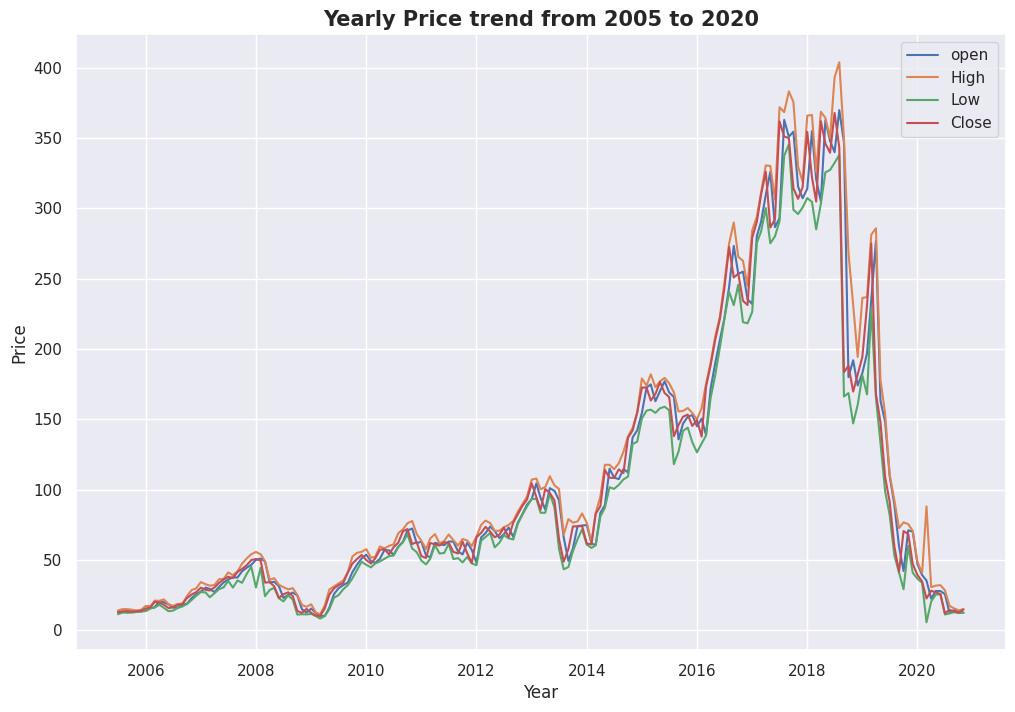

In [31]:
# Chart - 1 visualization code
#  visualizing price trend since 2005 to 2020
plt.figure(figsize = (12,8))
plt.grid(True)
plt.plot(df['Date'] , df['Open'] , label = 'open')     # for open stock price
plt.plot(df['Date'] , df['High'] , label = 'High')      # for High stock price
plt.plot(df['Date'] , df['Low'], label = 'Low')         # for Low stock price
plt.plot(df['Date'] , df['Close'], label = 'Close')     # for Closing stock price
plt.legend()
plt.title("Yearly Price trend from 2005 to 2020",fontweight='bold',fontsize=15)        # setting title
plt.xlabel('Year',fontsize = 12)      # setting x-label
plt.ylabel('Price',fontsize = 12)     # setting y-label

##### 1. Why did you pick the specific chart?

Line chart is good for visualizing price trends over time series data.

##### 2. What is/are the insight(s) found from the chart?

Stock price is increasing till 2018.

After 2018 price is decreased at very high rate.

We can say something happened in 2018 which impected the stock price negatively.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it also mentioned in problem statement that some fraud case happened in 2018, which impected the business very negatively, which we can also see in above line chart.

#### **2 - Trends in stock prices over the year**

#### Chart - 2

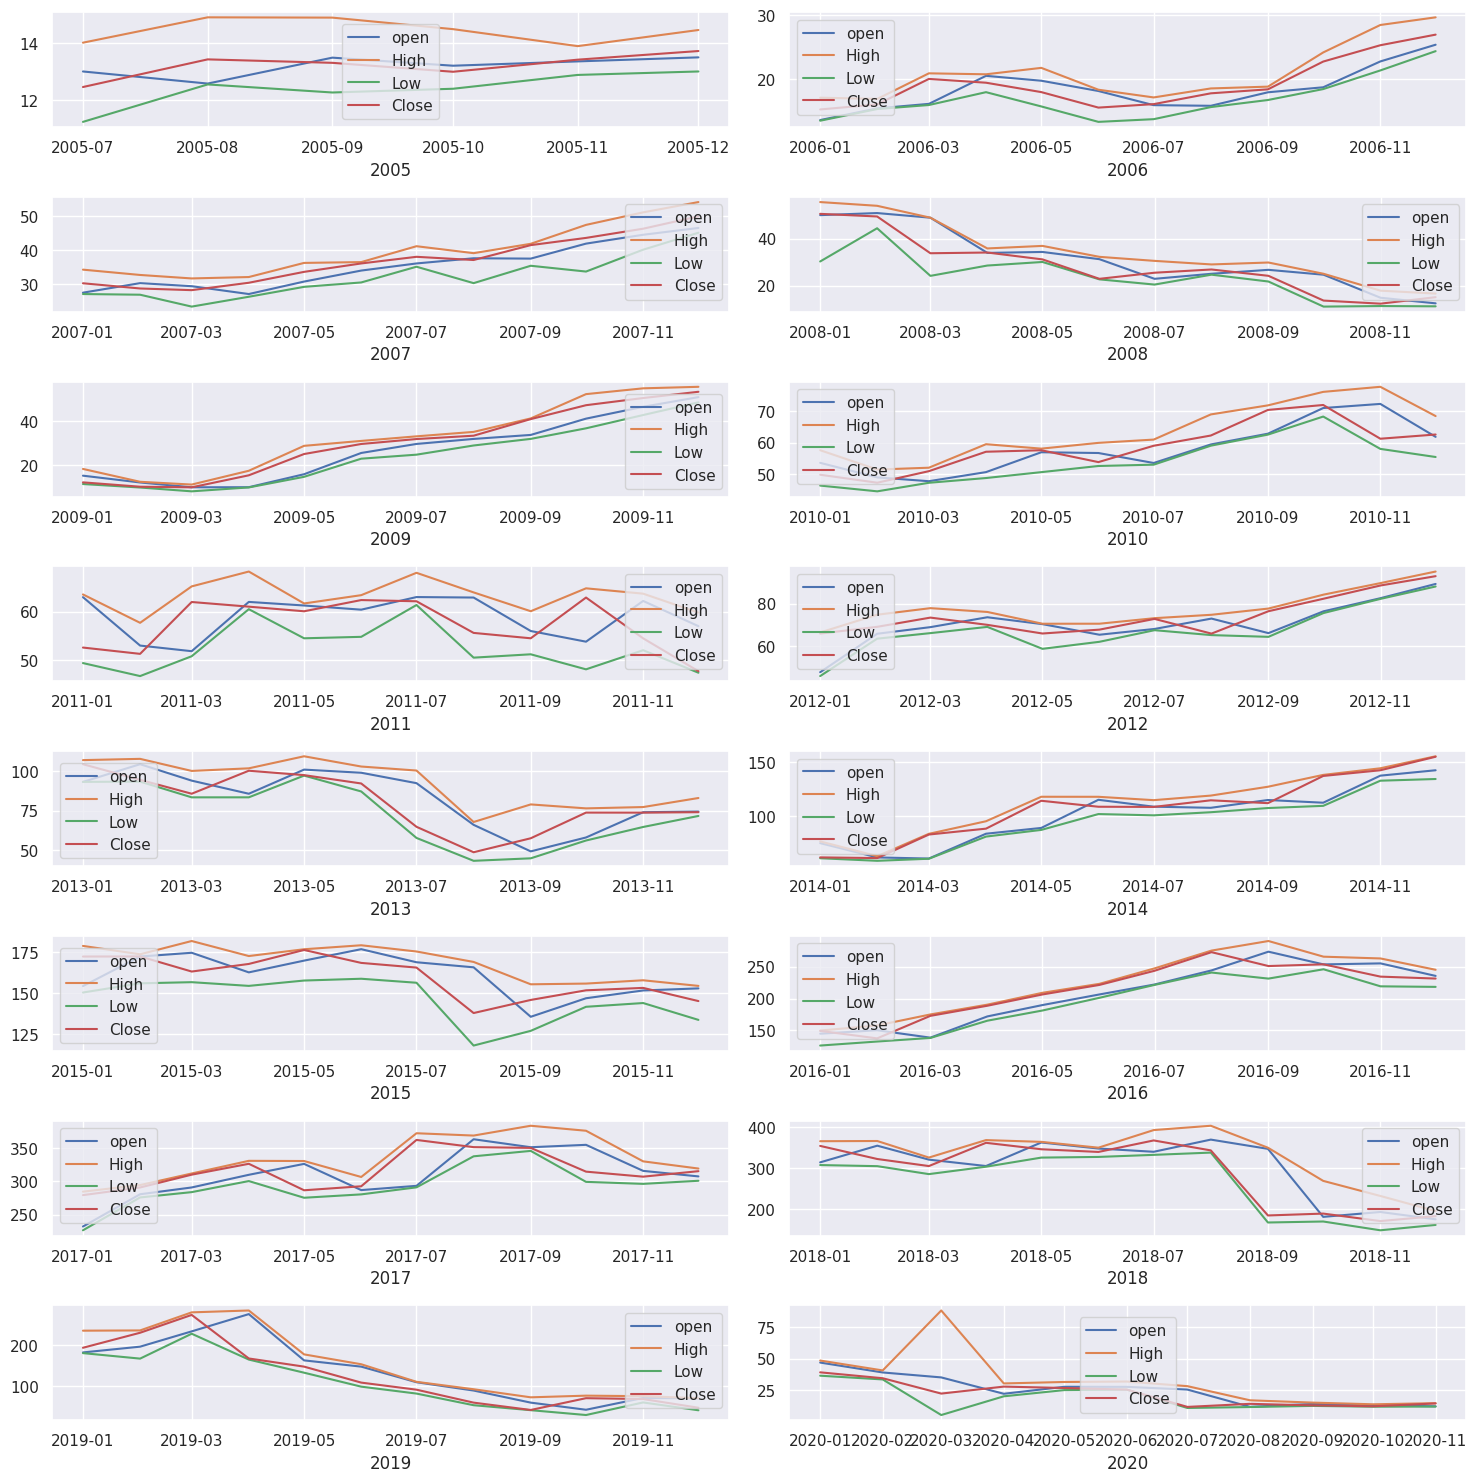

In [32]:
# Chart - 2 visualization code

# Visualizing price trends of each year separately
fig = plt.figure(figsize=(15,15))
c=1
for i in df['Date'].dt.year.unique() :
    plt.subplot(8, 2, c)
    plt.xlabel(i, fontsize = 12)
    plt.plot(df['Date'][df['Date'].dt.year == i] , df['Open'][df['Date'].dt.year == i] , label = 'open')
    plt.plot(df['Date'][df['Date'].dt.year == i] , df['High'][df['Date'].dt.year == i] , label = 'High')
    plt.plot(df['Date'][df['Date'].dt.year == i] , df['Low'][df['Date'].dt.year == i], label = 'Low')
    plt.plot(df['Date'][df['Date'].dt.year == i] , df['Close'][df['Date'].dt.year == i], label = 'Close')
    plt.legend()
    c = c + 1
plt.tight_layout()


##### 1. Why did you pick the specific chart?

To visualize price trends of each year separately line charts are good at visualizing price trends over period of time. We can see from above line charts when the prices were high and when they were low.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   In most of the year price is increasing or stable from start to end.
*   Except in 2008, price is going down.
*   From 2016 to 2018, price is increased at high rate.
*   In 2018, price is going up till august, then it decreased at very high rate.
*   In 2019 and 2020 also, price is continuously decreasing.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, it will help creating a positive business impact as stock price is increased at high rate in 2016 to 2018. They should implement the stragies, planning used in 2016 to 2018.




#### **3 - Average stock prices over the month**

In [33]:
monthly_stock_prices=df.groupby(df['Date'].dt.month).aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'})
monthly_stock_prices

,Open,High,Low,Close
Date,,,,
1,100.928000,117.346667,93.766000,108.774667
2,109.134667,116.035333,98.238667,107.760667
3,108.150667,123.670667,98.524000,113.014000
4,113.044000,125.709333,102.284667,114.450000
5,114.589333,122.090000,102.404667,112.874667
6,113.268000,118.471333,102.642000,109.661333
7,103.891250,117.493750,96.206250,108.322500
8,108.481875,116.064375,95.777500,103.386875
9,103.691875,114.283750,85.735625,93.343750


#### Chart - 3

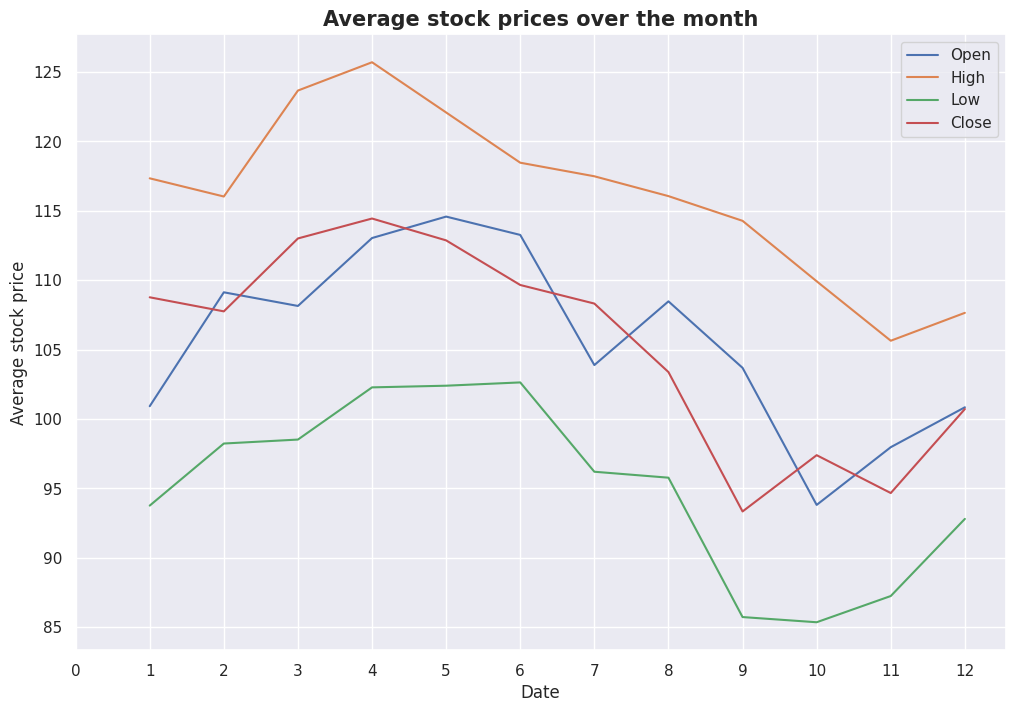

In [34]:
# Chart - 3 visualization code
# Visualizing Open, High, Low and Close average price  over months
monthly_stock_prices.plot()
plt.xticks(np.arange(13))
plt.ylabel('Month',fontsize = 12)                # setting y-label
plt.ylabel('Average stock price',fontsize = 12)                # setting y-label
plt.title('Average stock prices over the month',fontweight='bold',fontsize=15)        # setting title
plt.show()


##### 1. Why did you pick the specific chart?

To visualize average price trends over months, and line charts are good at visualizing price trends.

##### 2. What is/are the insight(s) found from the chart?

*   Stock price is relatively going down in september and october.
*   Stock price is high in march and april.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help create a positive business impact as it shows the monthly trend of the stock prices.

###**4 - Average Quarterly Stock prices**

In [35]:
quarterly_stock_prices=df.groupby(df['Date'].dt.quarter).aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'})
quarterly_stock_prices

,Open,High,Low,Close
Date,,,,
1,106.071111,119.017556,96.842889,109.849778
2,113.633778,122.090222,102.443778,112.328667
3,105.355000,115.947292,92.573125,101.684375
4,97.476596,107.744255,88.381702,97.531702


#### Chart - 4

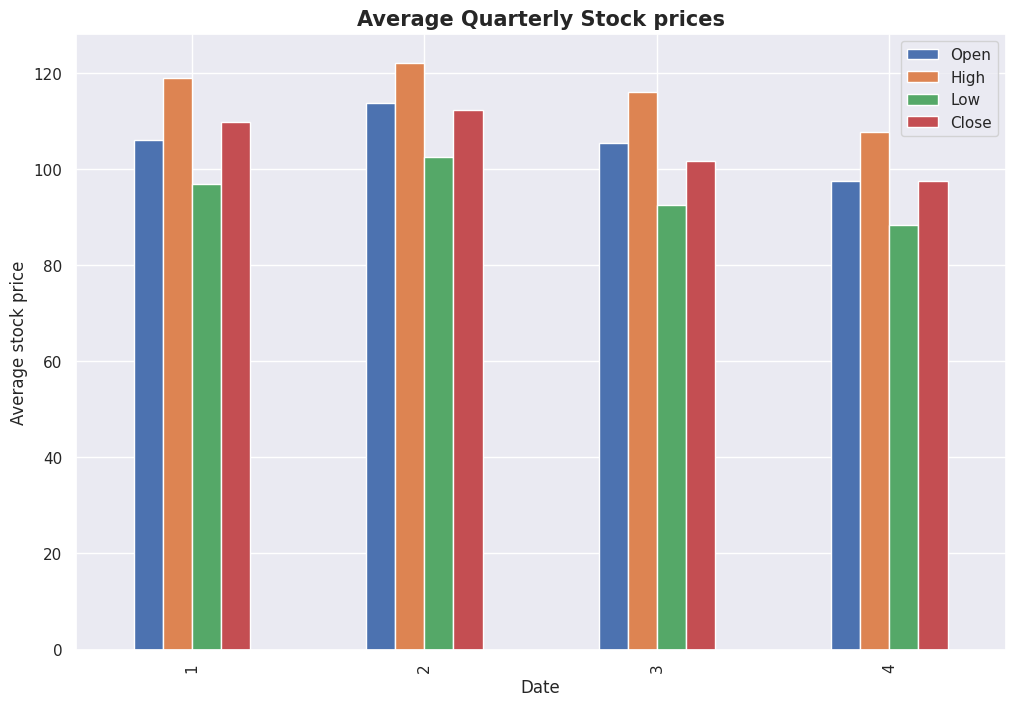

In [36]:
# Chart - 4 visualization code
# Visualizing Open, High, Low and Close average price trends over Quarter
quarterly_stock_prices.plot.bar()
plt.ylabel('Average stock price',fontsize = 12)                # setting y-label
plt.title('Average Quarterly Stock prices',fontweight='bold',fontsize=15)        # setting title
plt.show()


##### 1. Why did you pick the specific chart?

We have only 4 xticks here, so the bar plot is batter here.

##### 2. What is/are the insight(s) found from the chart?

Stock price is slightly low in last quarter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help create a positive business impact as it shows the quarterly trend of the stock prices.

### **5 - Distribution plot of our Dependent variable**

The main objective is to predict the stock’s closing price, so I will take close price as dependent variable(Target variable)

#### Chart - 5

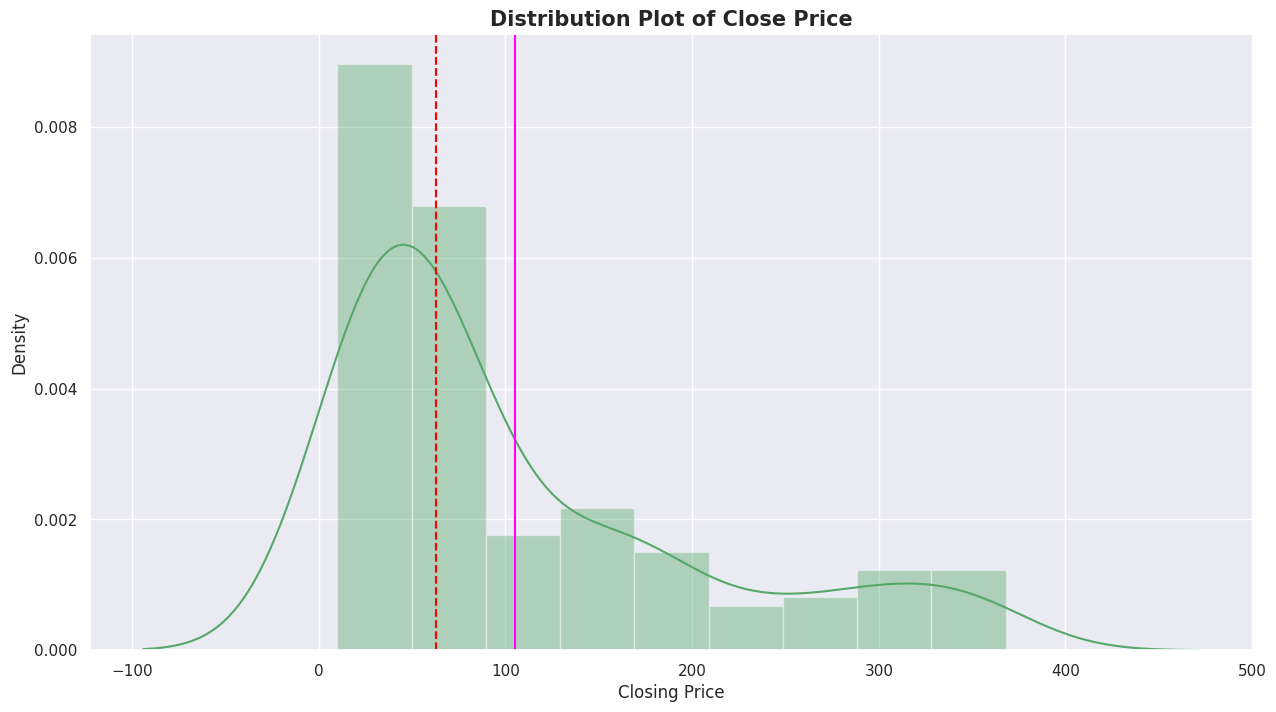

In [37]:
# Chart - 5 visualization code
# Dependent variable "Close"
plt.figure(figsize = (15,8))           # setting figsize
sns.distplot(df['Close'], color = 'g',kde=True)
plt.axvline(df['Close'].mean(),color='magenta',linewidth=1.5)
plt.axvline(df['Close'].median(),color='red',linestyle="dashed",linewidth=1.5)
plt.title('Distribution Plot of Close Price',fontweight='bold',fontsize=15)        # setting title
plt.xlabel('Closing Price', fontsize= 12)       # setting x-label
plt.ylabel('Density', fontsize=12)            # setting y-label
plt.show()

##### 1. Why did you pick the specific chart?

To check Distribution of oru dependent variable.

##### 2. What is/are the insight(s) found from the chart?

It is Right Skewed Distirbution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

The above graph shows that they are not a normal distribution curve.
The mean and median should be equal for perfect normal distribution curve.But, mean is not equal to median as there is not a perfect normal distribution curve.
We need to convert all the features to normal distribution using log transformation.




#### **6 - Box plot of our Dependent variable**

#### Chart - 6

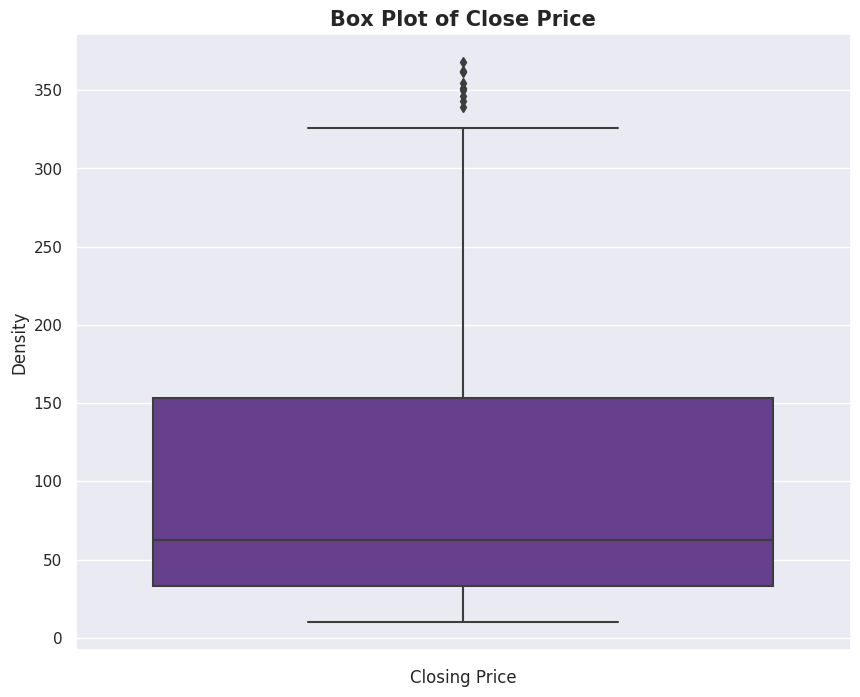

In [38]:
# Chart - 6 visualization code
plt.figure(figsize = (10,8))           # setting figsize
sns.boxplot(y=df['Close'], color="rebeccapurple")
plt.title('Box Plot of Close Price',fontweight='bold',fontsize=15)        # setting title
plt.xlabel('Closing Price', fontsize= 12)       # setting x-label
plt.ylabel('Density', fontsize=12)            # setting y-label
plt.show()

##### 1. Why did you pick the specific chart?

Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles.

##### 2. What is/are the insight(s) found from the chart?

Outliers are present in each column.By, converting our features to normal distribution using log transform .We can remove outliers from the dataset.

### **7 - Log tranformation to convert Dependent variable  to Normal Distribution**

#### Chart - 7

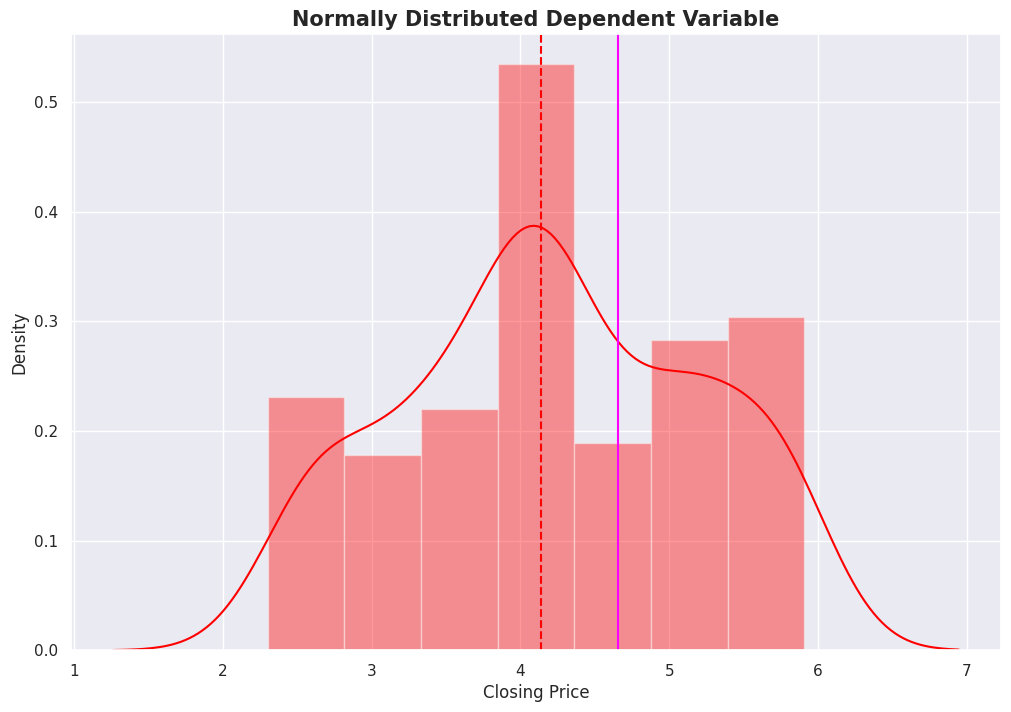

In [39]:
# Chart - 7 visualization code
sns.distplot(np.log(df['Close']),color = 'red',kde=True)
plt.title('Normally Distributed Dependent Variable',fontweight='bold',fontsize=15)        # setting title
plt.axvline(np.log(df['Close'].mean()),color='magenta',linewidth=1.5)
plt.axvline(np.log(df['Close'].median()),color='red',linestyle="dashed",linewidth=1.5)
plt.xlabel('Closing Price', fontsize= 12)       # setting x-label
plt.ylabel('Density', fontsize=12)            # setting y-label
plt.show()

##### 1. Why did you pick the specific chart?

Here log transformation is use in distribution plotto transform our Closing price to Normally distributed.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, We see that now our graph is nearly close to normal distribution.
Also mean is nearly equal to median.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to predict our model correctly.

#### **8 - Box plot of Normally distributed Closing Stock price**

#### Chart - 8

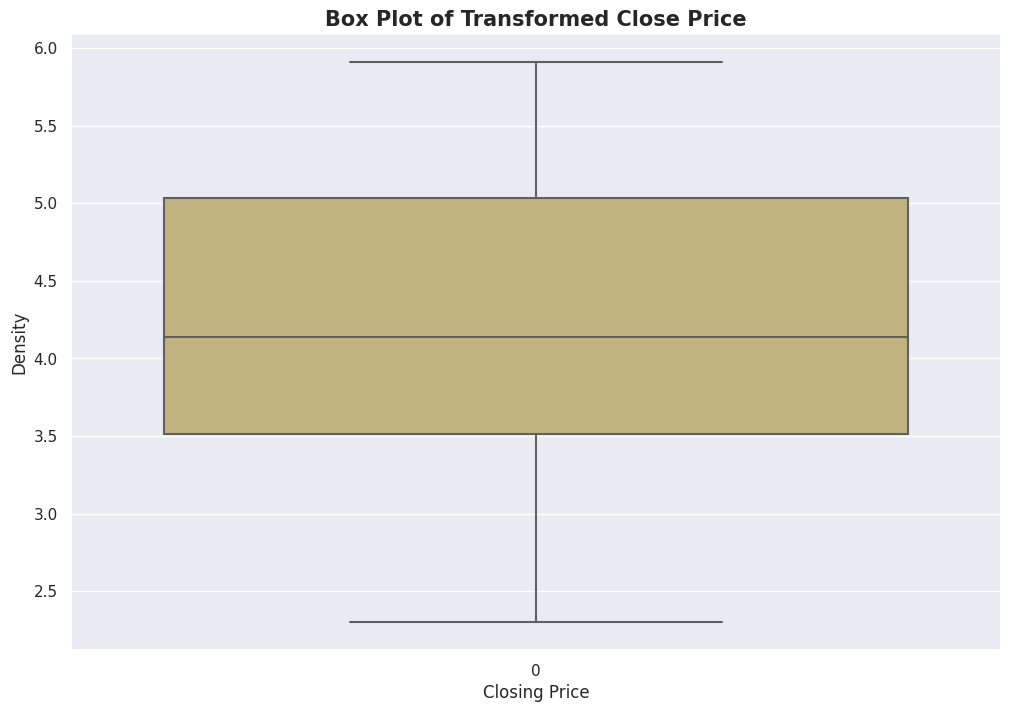

In [40]:
# Chart - 8 visualization code
sns.boxplot(np.log(df['Close']),color="y")
plt.title('Box Plot of Transformed Close Price',fontweight='bold',fontsize=15)        # setting title
plt.xlabel('Closing Price', fontsize= 12)       # setting x-label
plt.ylabel('Density', fontsize=12)            # setting y-label
plt.show()

##### 1. Why did you pick the specific chart?

Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles

##### 2. What is/are the insight(s) found from the chart?

From the above box plot, after applying log transformation we see that outliers are removed by log transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to predict our data correctly model.

#### **9 - Distribution plot of our Independent variables**




In [41]:
# Let's aassign our numericaal columns
numeric_features=df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

#### Chart - 9

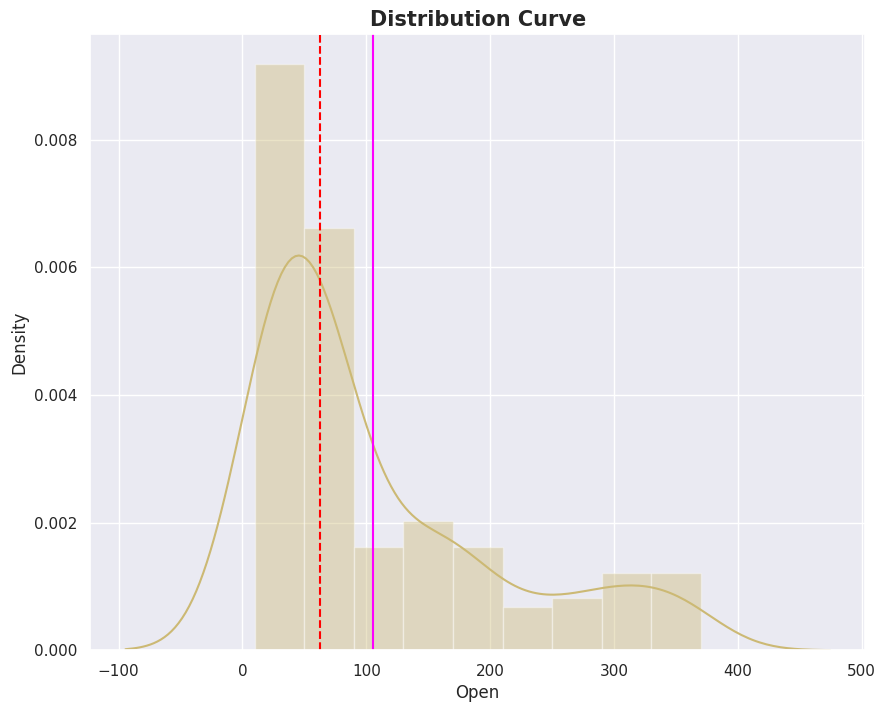

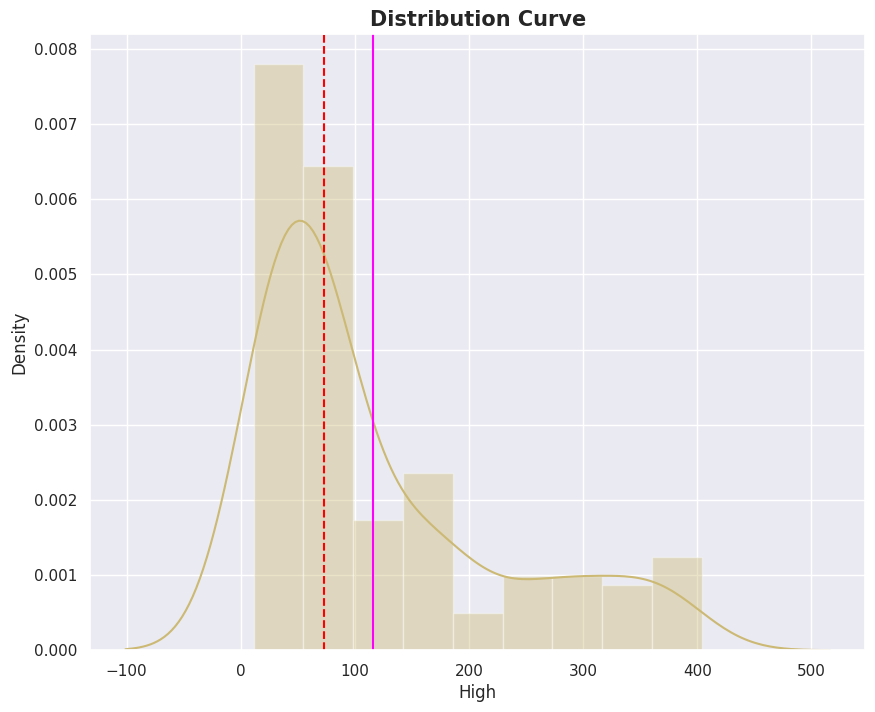

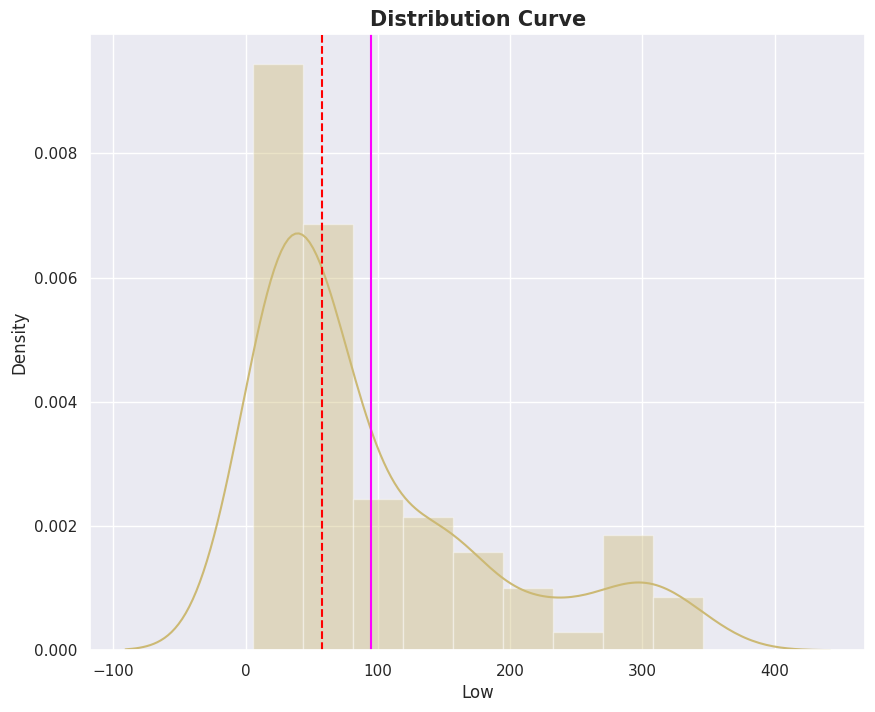

In [42]:
# Chart - 9 visualization code
# Let's get the distribution plot of our numeric features
for cols in numeric_features[0:3]:
  plt.figure(figsize=(10,8))        # setting figsize
  feature=df[cols]
  sns.distplot(x=df[cols],color="y")
  plt.axvline(df[cols].mean(),color='magenta',linewidth=1.5)
  plt.axvline(df[cols].median(),color='red',linestyle="dashed",linewidth=1.5)
  plt.title("Distribution Curve",fontweight='bold',fontsize=15)   # setting title
  plt.xlabel(cols,fontsize=12)        # setting x-label

plt.show()

##### 1. Why did you pick the specific chart?

To check Distribution of oru dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that they are not a normal distribution curve.
The mean and median should be equal for perfect normal distribution curve.But, mean is not equal to median as there is not a perfect normal distribution curve.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the above plot we see they're right skewed so we have to makeit normally distributed.

#### **10 - Box plot of our Inependent variable**

#### Chart - 10

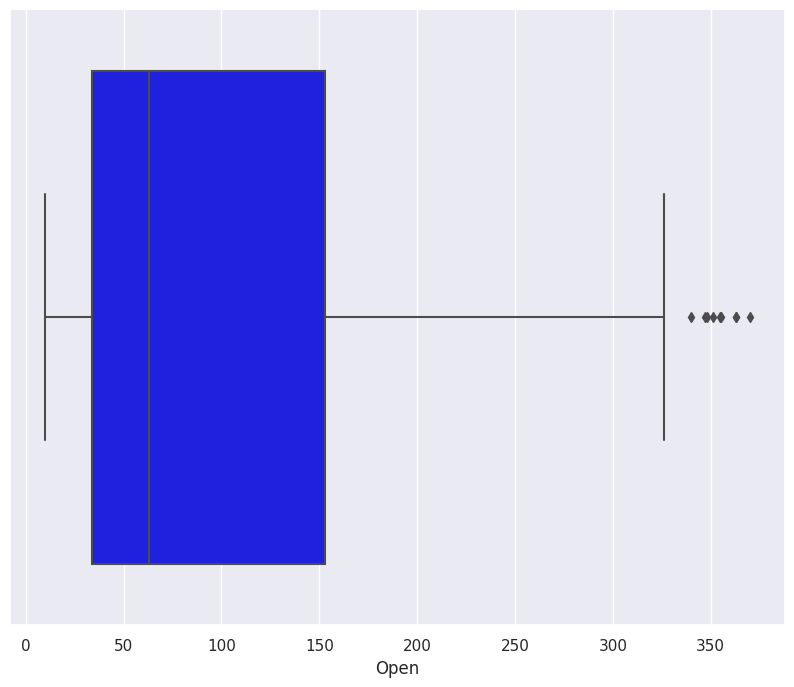

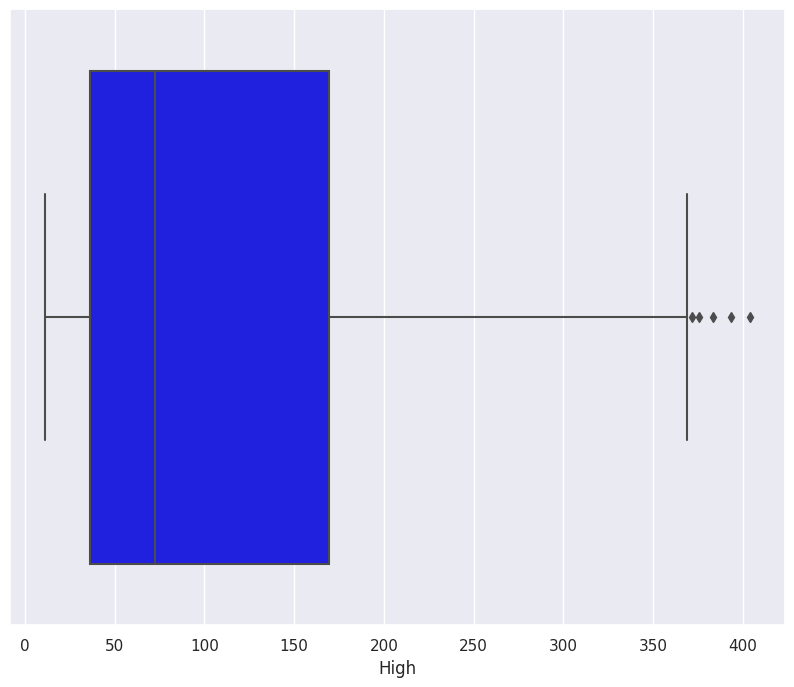

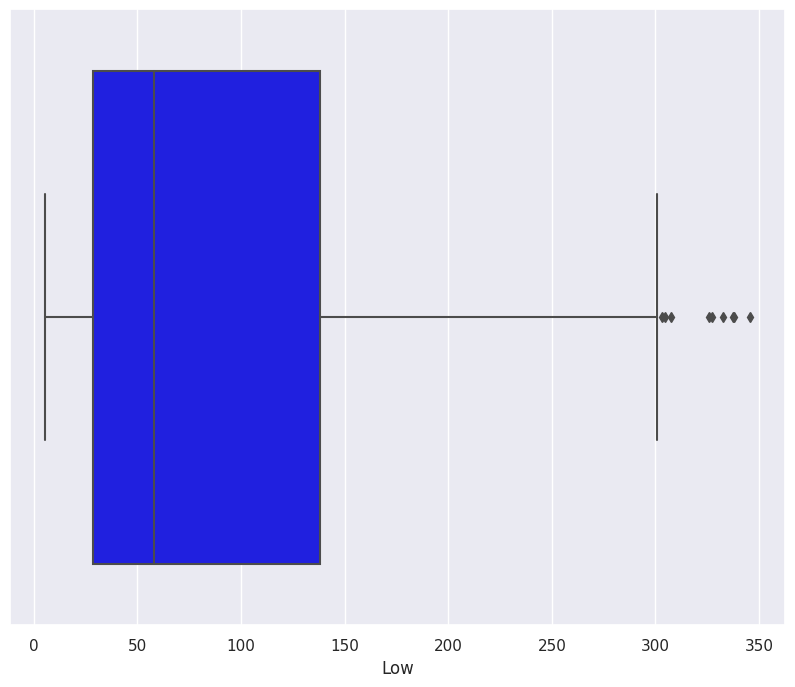

In [43]:
# Chart - 10 visualization code
for cols in numeric_features[0:3]:
  plt.figure(figsize=(10,8))        # setting figsize
  feature=df[cols]
  sns.boxplot(x=df[cols],color="blue")

  plt.xlabel(cols,fontsize=12)        # setting x-label

plt.show()

##### 1. Why did you pick the specific chart?

Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles

##### 2. What is/are the insight(s) found from the chart?

Outliers are present in each column.By, converting our features to normal distribution using log transform .We can remove outliers from the dataset.

#### **11 - Log tranformation to convert Independent variable  to Normal Distribution**

#### Chart - 11

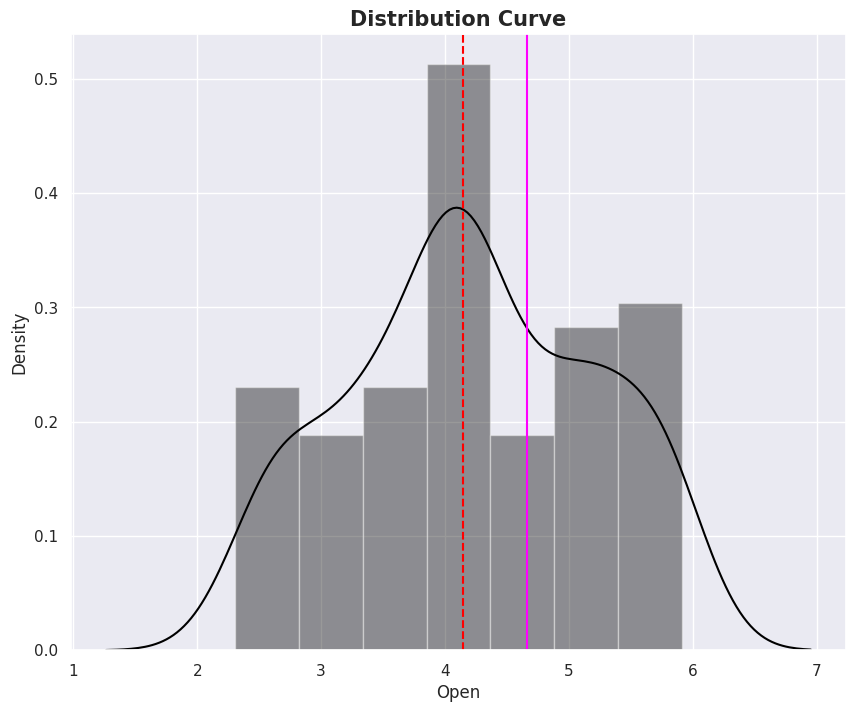

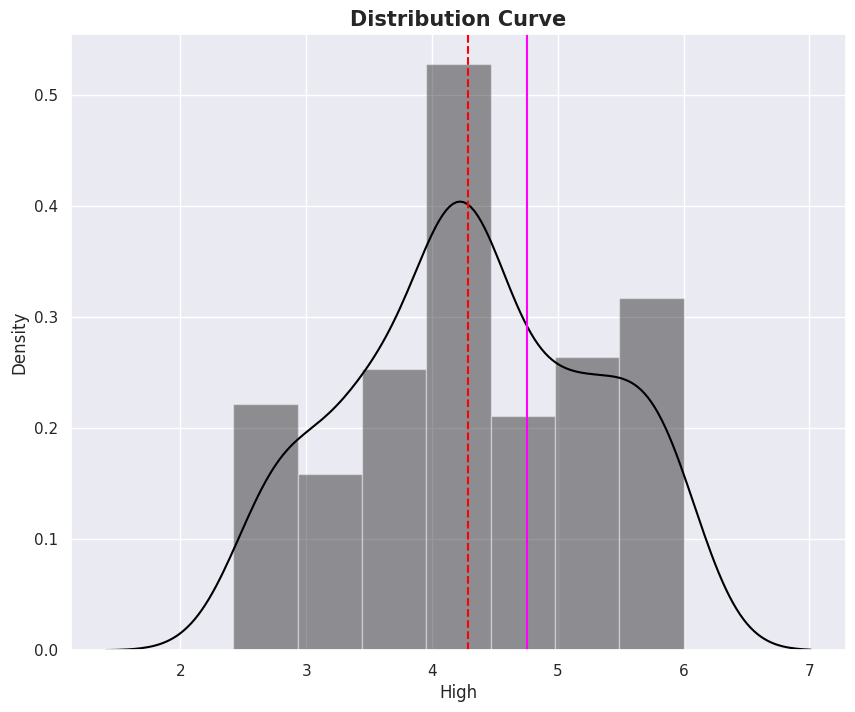

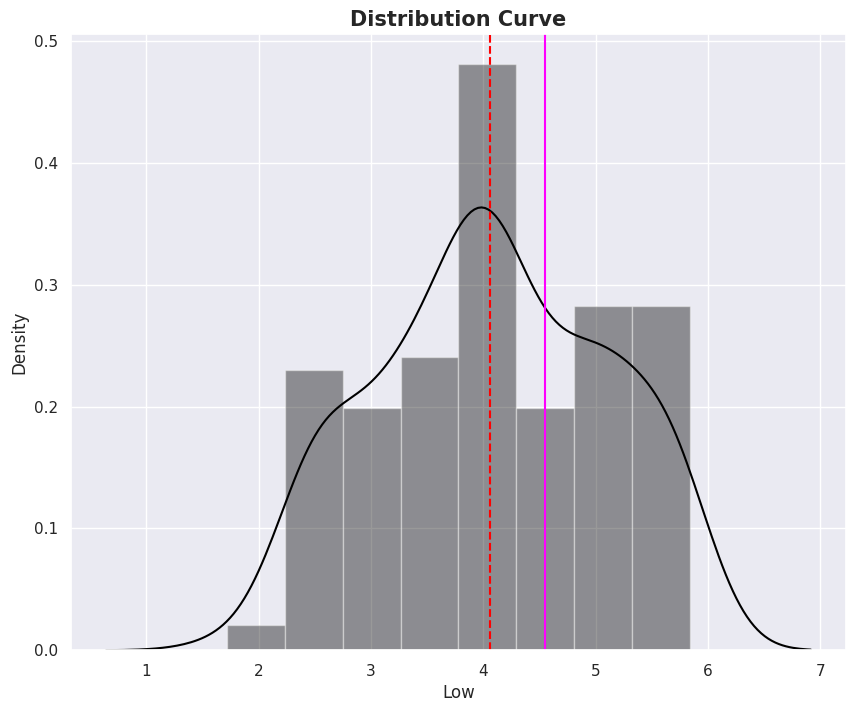

In [44]:
# Chart - 11 visualization code
for cols in numeric_features[0:3]:
  plt.figure(figsize=(10,8))        # setting figsize
  feature=df[cols]
  sns.distplot(np.log(df[cols]),color = 'Black',kde=True)
  plt.axvline(np.log(df[cols].mean()),color='magenta',linewidth=1.5)
  plt.axvline(np.log(df[cols].median()),color='red',linestyle="dashed",linewidth=1.5)
  plt.title("Distribution Curve",fontweight='bold',fontsize=15)   # setting title
  plt.xlabel(cols,fontsize=12)        # setting x-label

plt.show()

##### 1. Why did you pick the specific chart?

Here log transformation is use in distribution plotto transform our independent variables Normally distributed.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, We see that now our graph is nearly close to normal distribution.
Also mean is nearly equal to median.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to predict our data correctly model.

#### **12 - Box plot of Normally ditributed Independent variables**

#### Chart - 12

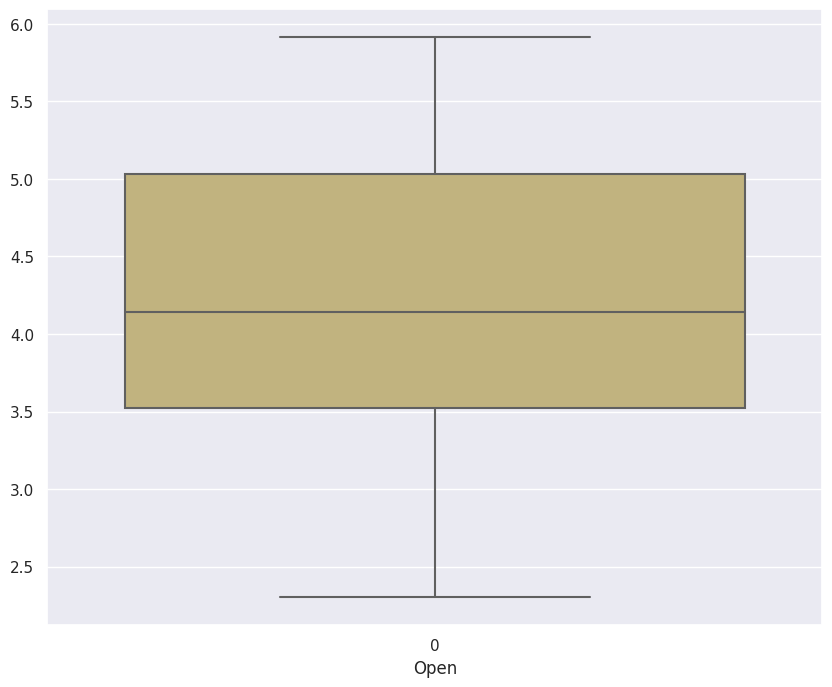

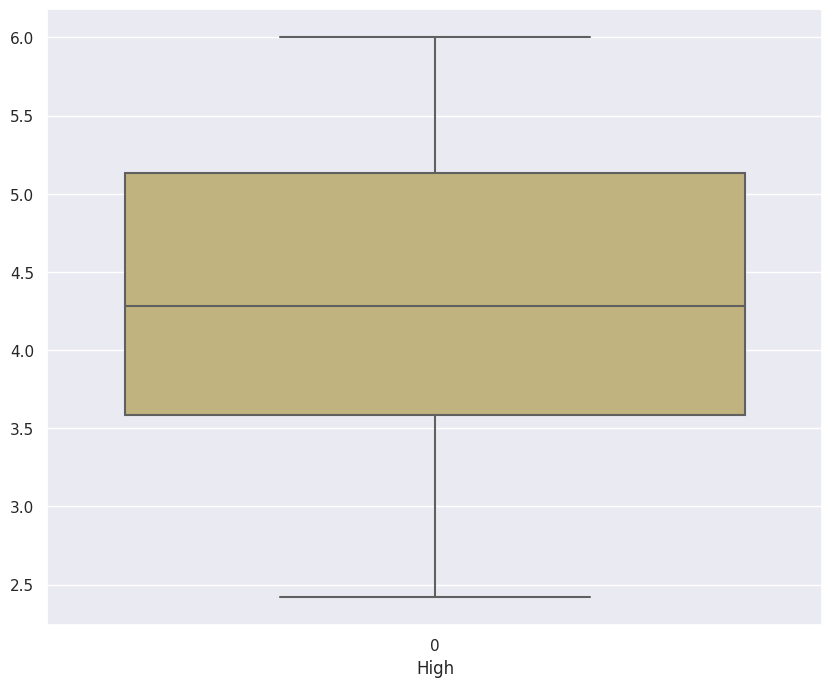

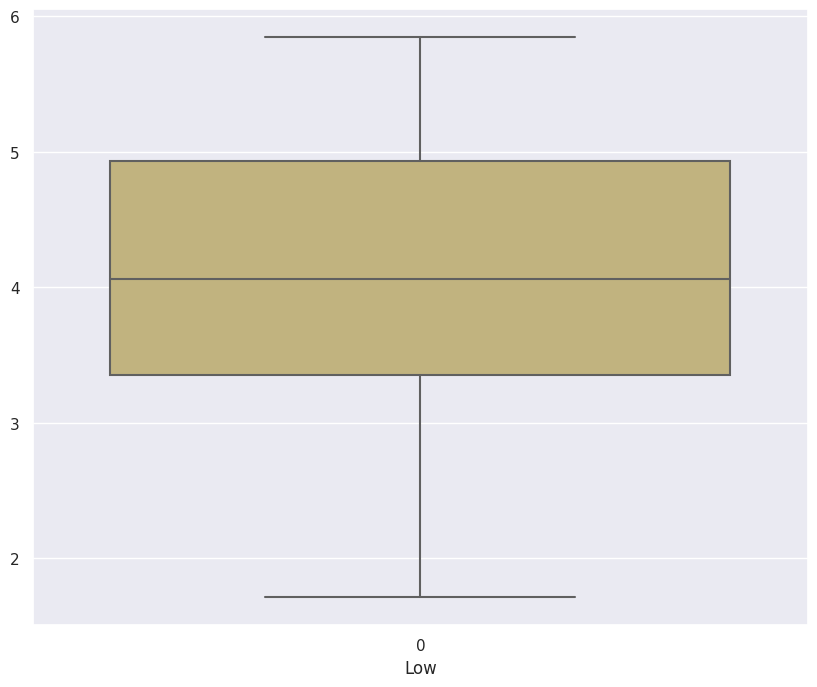

In [45]:
# Chart - 12 visualization code
for cols in numeric_features[0:3]:
  plt.figure(figsize=(10,8))        # setting figsize
  feature=df[cols]
  sns.boxplot(np.log(df[cols]),color="y")
  #sns.boxplot(np.log(x=df[cols]),color="blue")

  plt.xlabel(cols,fontsize=12)        # setting x-label

plt.show()

##### 1. Why did you pick the specific chart?

Box Plot: It is a type of chart that depicts a group of numerical data through their quartiles

##### 2. What is/are the insight(s) found from the chart?

From the above box plot, after applying log transformation we see that outliers are removed by log transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to get our data correctly model.

#### **13 - Correlation plot between independent and dependent variablies**

#### Chart - 13

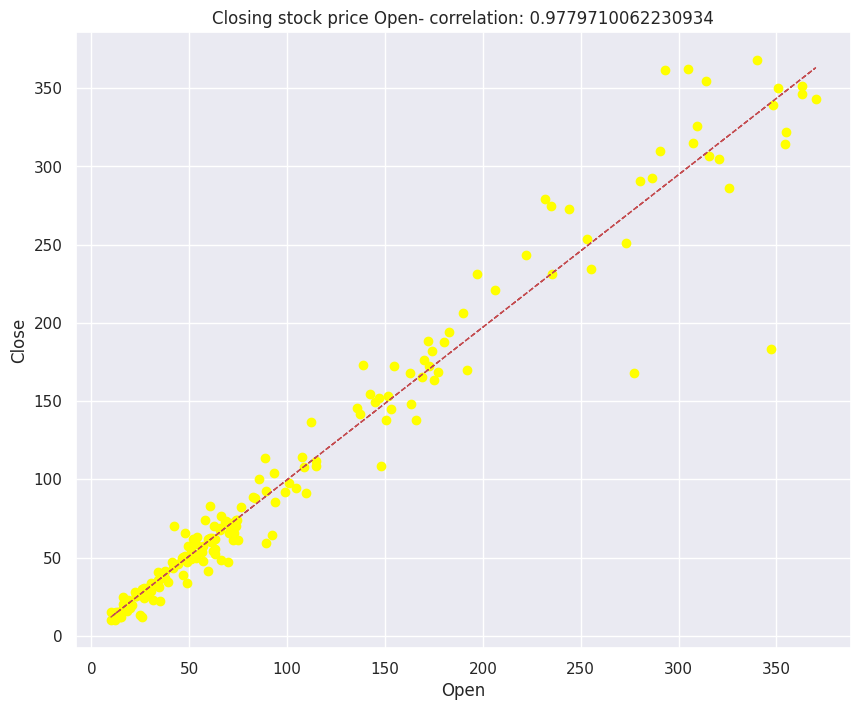

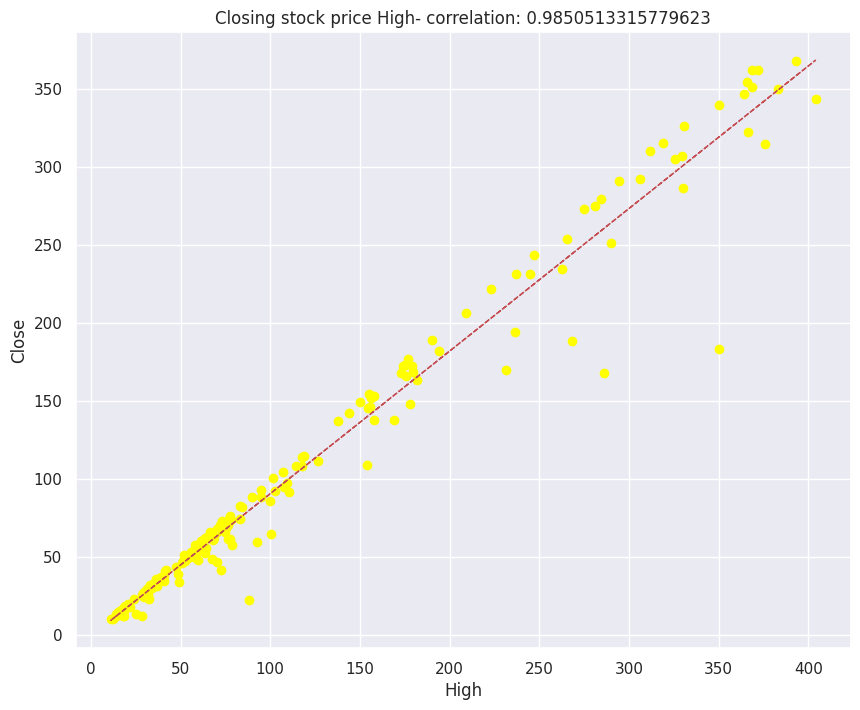

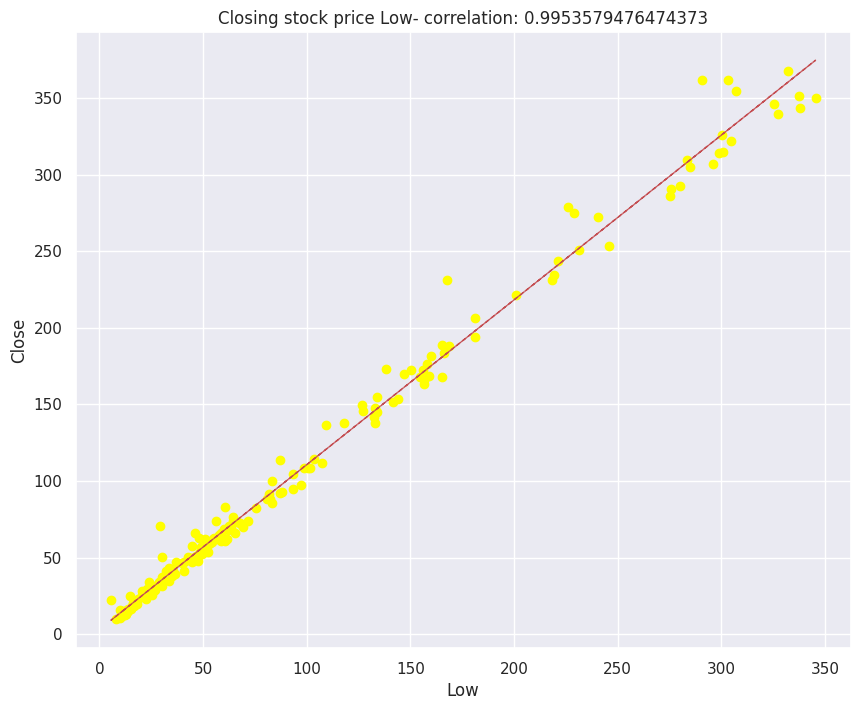

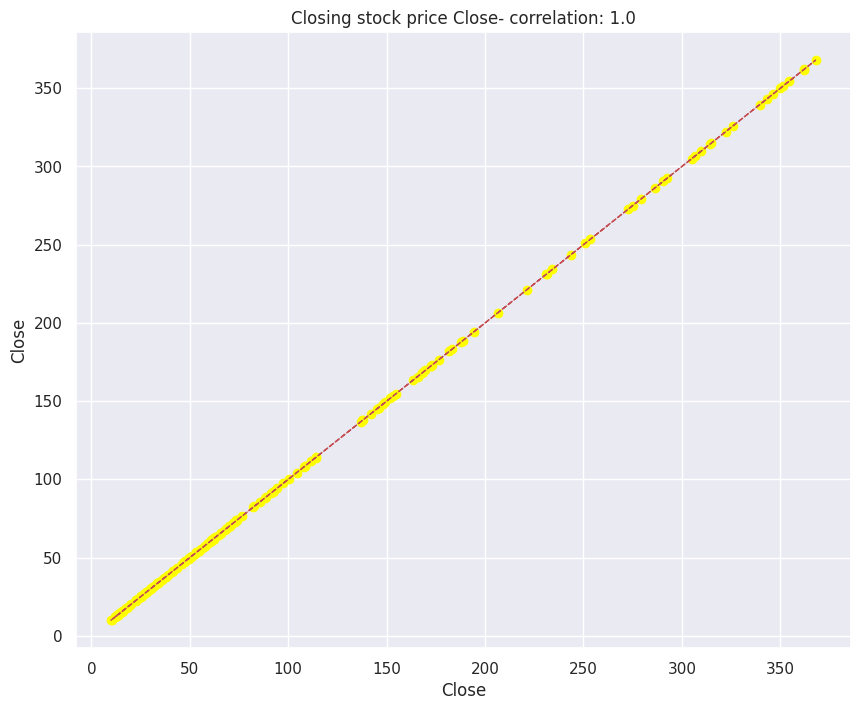

In [46]:
# Chart - 13 visualization code
for col in numeric_features:
  fig=plt.figure(figsize=(10,8))
  ax=plt.gca()
  feature=df[col]
  label=df['Close']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label,c='yellow')
  plt.xlabel(col)                        # setting x-label
  plt.ylabel('Close')         # setting y-label
  ax.set_title('Closing stock price ' + col + '- correlation: ' + str(correlation))          # setting title
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

The scatter plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Scatter plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

##### 2. What is/are the insight(s) found from the chart?

We see that we have strong Correlation between our dependent and independent variable and a linear pattern is there.

The above graphs depicts that there is high correlation between dependent(Close) and independent(High,Low,Open) features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We try to reduce the correlation for better prediction of the model.
We calculate the VIF factor to reduce the multicollinearity between independent variabls.

#### 14 - Correlation Heatmap

#### Chart - 14

Text(0.5, 1.0, 'Correlation between all the varibles')

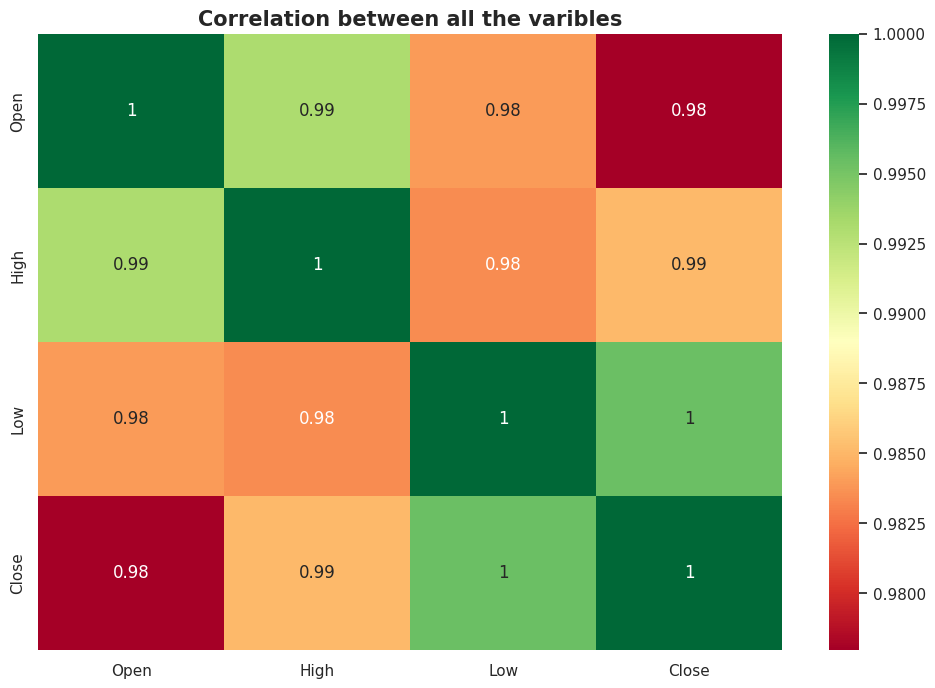

In [47]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation=df.corr()
#mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), annot=True,cmap='RdYlGn')
plt.title('Correlation between all the varibles', fontsize=15,fontweight='bold')    # setting title

##### 1. Why did you pick the specific chart?

Heatmap is good visualizing corellation between variables.

##### 2. What is/are the insight(s) found from the chart?

Now, All variables are showimg the highest correlation among them.

#### 15 - Pair Plot

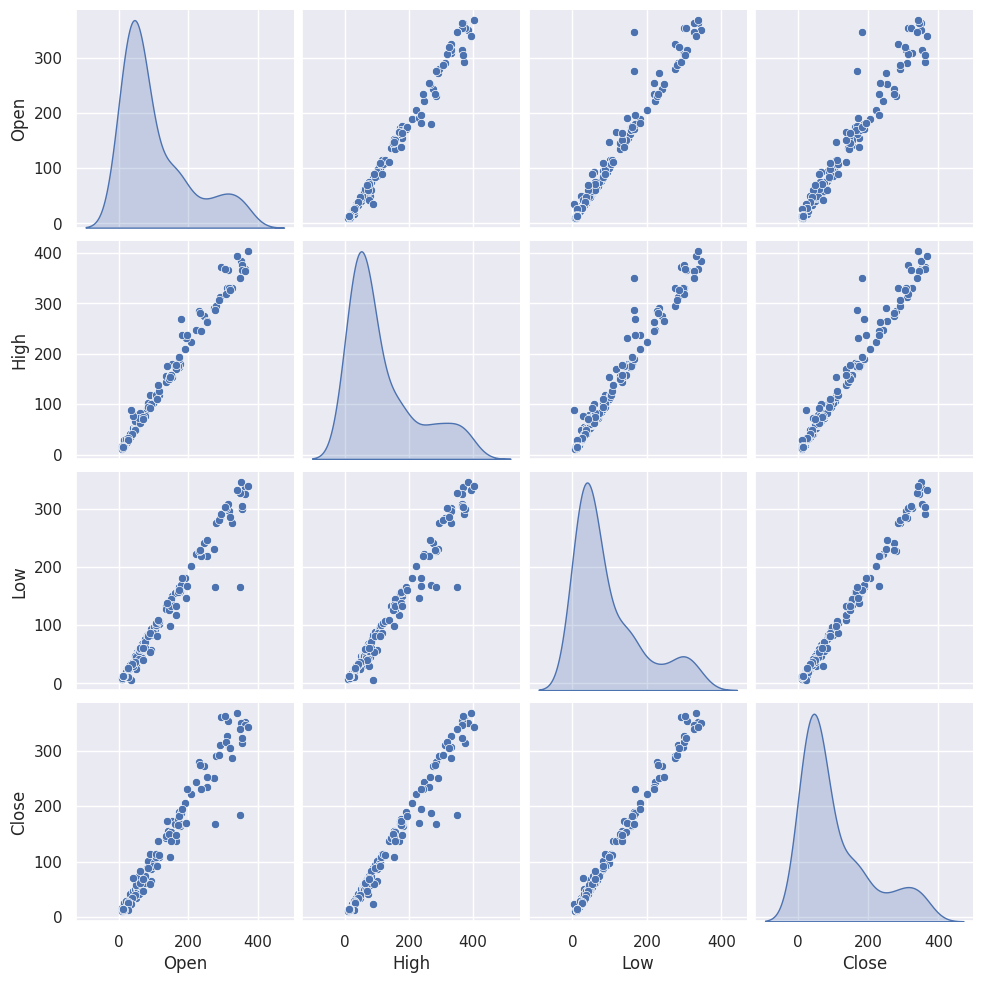

In [48]:
# Pair Plot visualization code
sns.pairplot(df , diag_kind = 'kde')

##### 1. Why did you pick the specific chart?

Pair plot is good as visualising scatter plot and distribution together.
Pair plot is also good at showing realtion variables with scatter plot.
I used pair plot to analyse the patterns of data and realationship between the features.
It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Open , high, low and close variables has skewed diatribution.
Open , high, low and close variables are showing strong linear pattern with each other.

**Multicollinearity** :- Multicollinearity is when two independent variables are highly correlated with each other. Multicollinearity affects the regression model therefore we will be removing multicollinearity using Variance Inflation Factor (VIF).

Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [49]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.

We are not removing any column because all the columns are equally important for prediction.

Removing column lead to loss of valuable information(features) which are essential for accurate prediction for the model.It results in bad model.So,We are not deleting any featues form the dataset and try to predict the result and see how the model performs with multicollinearity and evaluate the performance of the model.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   Average Closing stock price is more than 100.

2.   Average Closing stock price is equals to average Opening stock Price.

3.   Average closing stock price in 2018 is more than 300.






### Hypothetical Statement - 1

Average Closing stock price is more than 100.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 100

Alternate hypothesis H1 : μ > 100

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
mean = 100
sample_mean = np.mean(df['Close'])         # mean
sample_size = df['Close'].size             # sample size
std = np.std(df['Close'])                  # standard deviation

# z-test
z_value = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - norm.cdf(z_value)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Failed to reject the Null Hypothesis as p-value = 0.23575048075613925.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis.

##### Why did you choose the specific statistical test?

Because sample sizes are large enough, more than 30.

### Hypothetical Statement - 2

Average Closing stock price is equals to average Opening stock Price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ1 = μ2

Alternate hypothesis H1 : μ1 ≠ μ2

Test type : Two Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
open_mean = np.mean(df['Open'])              # mean
close_mean = np.mean(df['Close'])

open_size = df['Close'].size                 # sample size
close_size = df['Close'].size

open_var = np.var(df['Open'])                # Variance
close_var = np.var(df['Close'])

# z-test
z_value = (open_mean - close_mean) / np.sqrt((open_var/open_size) + (close_var/close_size))

# calculate p-value
p_value = norm.cdf(z_value)

# Two tailed test
if p_value < 0.5:
  p_value = p_value * 2
else:
  p_value = (1 - p_value)*2

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")

Failed to reject the Null Hypothesis as p-value = 0.9737638583014707.


##### Which statistical test have you done to obtain P-Value?

I have used two sample Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis. so, we can conclude that average Closing stock price is equal to average Opening stock Price.

##### Why did you choose the specific statistical test?

Because sample sizes are large enough, more than 30.

### Hypothetical Statement - 3

Average closing stock price in 2018 is more than 300.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 300

Alternate hypothesis H1 : μ > 300

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value
mean = 100
sample_mean = np.mean(df['Close'][df['Date'].dt.year == 2018])         # mean
sample_size = df['Close'][df['Date'].dt.year == 2018].size             # sample size
std = np.std(df['Close'][df['Date'].dt.year == 2018])                  # standard deviation

# t-test
t_statistic = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - t.cdf(t_statistic, sample_size-1)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Null Hypothesis rejected Successfully as p-value = 2.1097283474658113e-06


##### Which statistical test have you done to obtain P-Value?

I have used t-test as the statistical test to obtain P-Value and found the result that At the 5% significance level, we have sufficient evidence to reject the Null hypothesis. so, we can conclude that average closing stock price in 2018 is more than 300.

##### Why did you choose the specific statistical test?

Because sample size is small, less than 30.
And population variance is unknown.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation
missing_values=df.isnull().sum()
print( f'The missing values present in our dataset is {missing_values}')

The missing values present in our dataset is Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in the dataset.

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments
'''
# No outliers
'''


'\n# No outliers\n'

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers in the dataset.

### 3. Data Transformation

X = Independent Variable

y = Dependent Variable

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, Data transformation is need on 'Close' i.e., on our dependet varibale as we saw in earlier plot, it is a right skewed distribution. So, I'm going to use log transform.

In [55]:
# Splitting our data into Dependent and Independent Variables
X = df.drop(columns=['Close','Date'])
# Let's call our dependent variable "Close" as y
y = df['Close']

In [56]:
# Transform Your data
X = X.apply(zscore)
y = np.log10(y)


### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed here because Dimensionality reduction is a process of reducing the number of features and we do not have too many features in this dataset.

In [57]:
# DImensionality Reduction (If needed)

# No, dimensionality reduction is not needed here because there are not too many features.

### 5. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.
# splitting the dataset into the training set and test set
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

##### What data splitting ratio have you used and why?

The splitting ratio we took is 80/20, because

A common splitting ratio for supervised learning tasks is the 80/20 or 70/30 split, where 80% or 70% of the data is used for training the model, and the remaining 20% or 30% is used for evaluating the model's performance on unseen data (i.e., testing data). This ensures that the model is not overfitting to the training data and can generalize well to new, unseen data.

Also we don't have larger dataset here and we need to take a decent amount of data to full fill testing process. if we had a larger datasets, a 90/10 or 95/5 split may be used, where the model is trained on a larger portion of the data, while still keeping a small portion aside for evaluation

In [59]:
# Let's get the shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the X_train dataset : (148, 3)
Shape of the X_test dataset : (37, 3)
Shape of the y_train dataset : (148,)
Shape of the y_test dataset : (37,)


## ***7. ML Model Implementation***

We will build these regression models for our data.

**1. Linear Regression**

**2. Ridge Rigression**

**3. Lasso Rigression**

**4. Elastic Net Regression**

**5. XG Boost Regression**

By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.


### ML Model - 1

## Linear Regression

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.



*   You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.
*   The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.



In [60]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train, y_train)

# Print the score of regression model
print(f'Training Score : {round(regressor.score(X_train,y_train),2)}')
print(f'Testing Score : {round(regressor.score(X_test,y_test),2)}')

Training Score : 0.81
Testing Score : 0.82


In [61]:
# Predict on the model
y_pred=regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [62]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [64]:
# Let's create the DataFrame to store test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [65]:
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Here, different features(independent variables) are taken, multiplied by best possible coefficient(identified by gradient descant) and added together to predict dependent variable.

In [66]:
# Visualizing evaluation Metric Score chart
# Test Performance of Linear Regregression

print("MSE value :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 score :", round(r2_score(y_test, y_pred),4))

MSE value : 0.0316
RMSE value : 0.1777
MAE value : 0.1513
MAPE value : 0.0954
r2 score : 0.8226


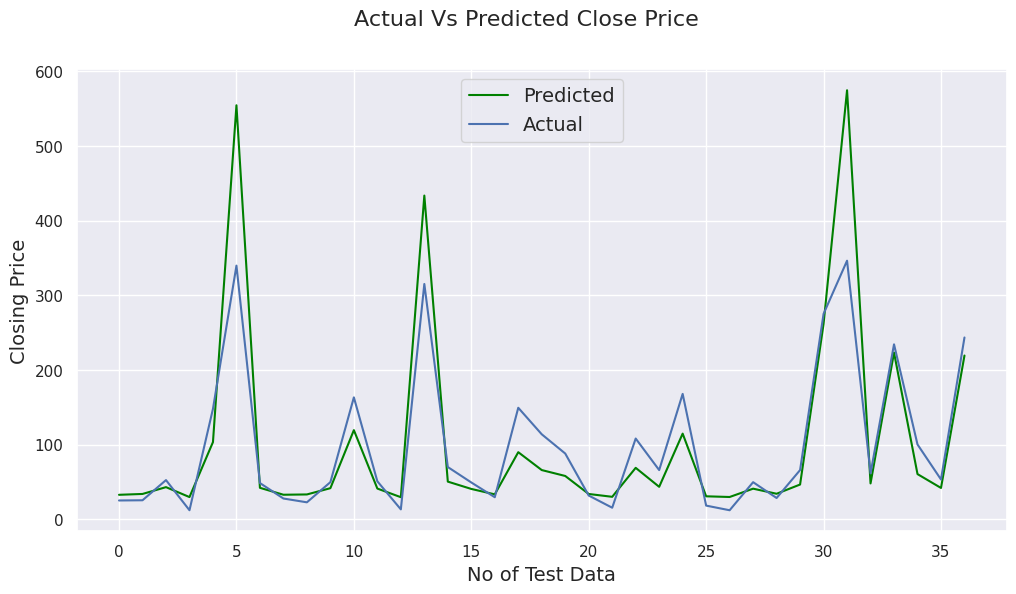

In [67]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(y_pred),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize =16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)


At some points difference between actual and prediction is very high.

### ML Model - 2

##**Ridge Rigression**




As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1.   α = 0:
  *   The objective becomes same as simple linear regression.
  *   We’ll get the same coefficients as simple linear regression.


2.   α = ∞:

    *   The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

3.   0 < α < ∞:

  *   The magnitude of α will decide the weightage given to different parts of objective.
  *   The coefficients will be somewhere between 0 and ones for simple linear regression.











In [68]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [69]:
# Accuracy of Ridge regression model
print(f'Training Score : {round(ridge.score(X_train,y_train),2)}')
print(f'Testing Score : {round(ridge.score(X_test,y_test),2)}')


Training Score : 0.81
Testing Score : 0.82


No change in training and testing Scores here.

In [70]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge


array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [71]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge is one of regularization technique used for linear regression. It adds penality in regression function and helps in handling overfitting large data sets.

In [72]:
# Visualizing evaluation Metric Score chart


# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge), 4))

MSE score: 0.0317
RMSE score: 0.1779
MAE score: 0.1514
MAPE score: 0.0955
R2 score: 0.8221


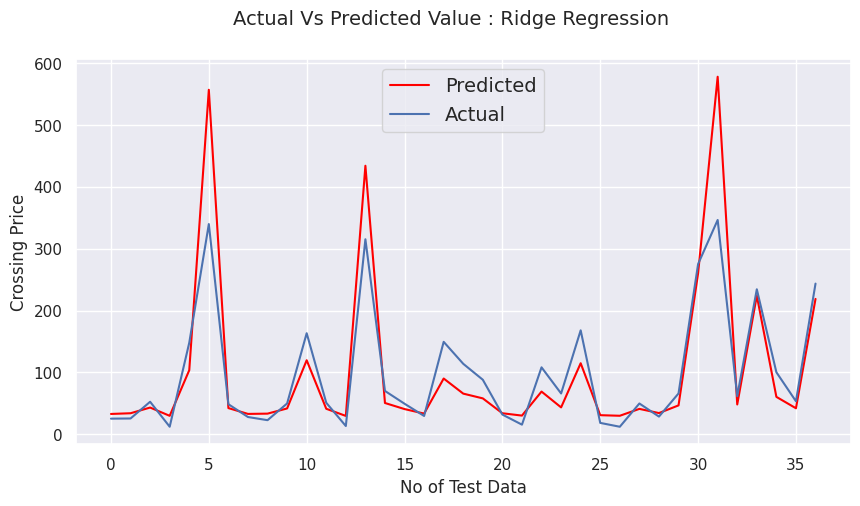

In [73]:
# Actual Price vs predicted price for Ridge Regression plot
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Ridge Regression', fontsize= 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Crossing Price', fontsize= 12)
plt.grid(True)

At some points difference between actual and prediction is very high.

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

*   To overcome over-fitting problems, we use a technique called Cross-Validation.
*   Let’s dive deep and learn about some of the model evaluation techniques.



In [74]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [75]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [77]:
ridge_regressor.score(X_train, y_train)

-0.03412222697057313

In [78]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative MSE(mean squared error) score is : -0.035


In [79]:
print(f'Training Score : {ridge_regressor.score(X_train,y_train)}')
print(f'Testing Score : {ridge_regressor.score(X_test,y_test)}')

Training Score : -0.03412222697057313
Testing Score : -0.03253593988266965


In [80]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [81]:

# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge1), 2))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge1), 4))


MSE score: 0.0325
RMSE score: 0.1804
MAE score: 0.15
MAPE score: 0.0968
R2 score: 0.8172


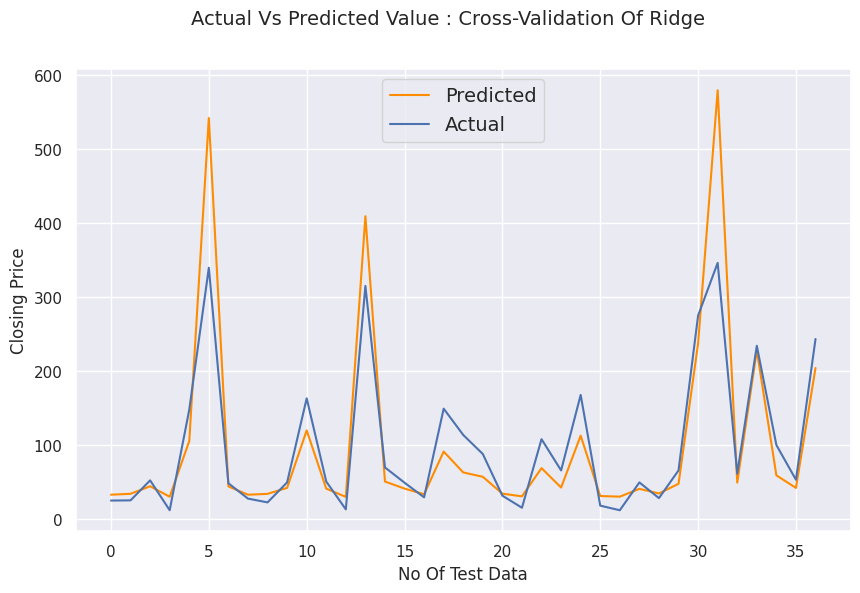

In [82]:
# actual Price Vs Predicted Price for ridge regression
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,6))
plt.plot(predicted,color='darkorange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True)


##### Which hyperparameter optimization technique have you used and why?

I have used grid search CV to find the optimal parameter as it's best possible way here to identify best parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The R2 score of of Ridge was 0.8221 while after cross validation it is 0.8172, thus there is no improvement.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2 is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

### ML Model - 3

##**Lasso Regression**

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)
Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1.   α = 0: Same coefficients as simple linear regression
2.   α = ∞: All coefficients zero (same logic as before)
3.   0 < α < ∞: coefficients between 0 and that of simple linear regression





In [83]:
# ML Model - 3 Implementation
lasso1 = Lasso(alpha=0.005, max_iter = 3000)
lasso1.fit(X_train, y_train)

# Fit the Algorithm

# Predict on the model

Lasso(alpha=0.005, max_iter=3000)

In [84]:
# Accuracy of Ridge regression model
print(f'Training Score : {round(lasso1.score(X_train, y_train), 4)}')
print(f'Testing Score : {round(lasso1.score(X_test,y_test),4)}')


Training Score : 0.8144
Testing Score : 0.82


In [85]:

# prediction of train data
y_pred_lasso = lasso1.predict(X_test)
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [86]:

np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Just like ridge regression it is another regularization technique used for linear regression, it used magnitute of coefficient.

In [87]:
# Visualizing evaluation Metric Score chart

# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


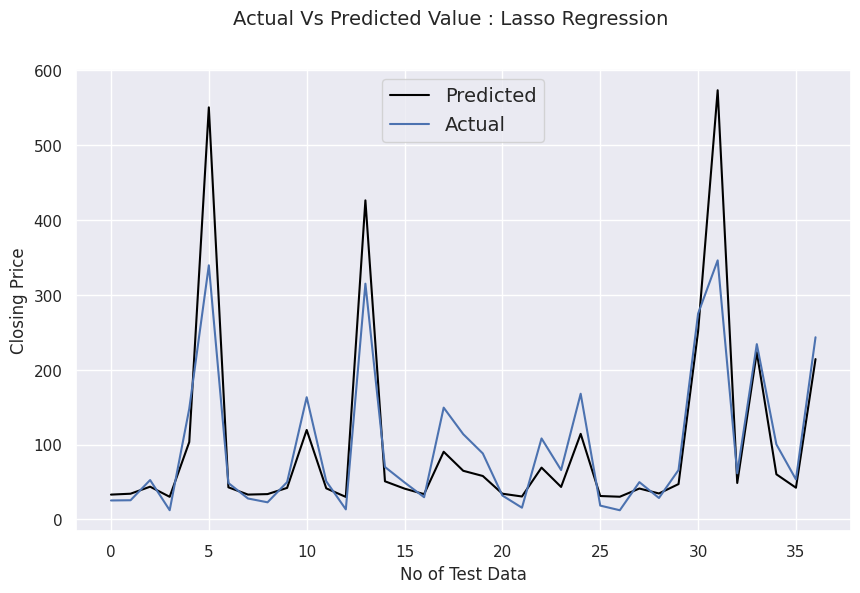

In [88]:

# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(y_pred_lasso),color='black')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Lasso Regression', fontsize = 14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid(True)


#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [91]:

# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [92]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [93]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


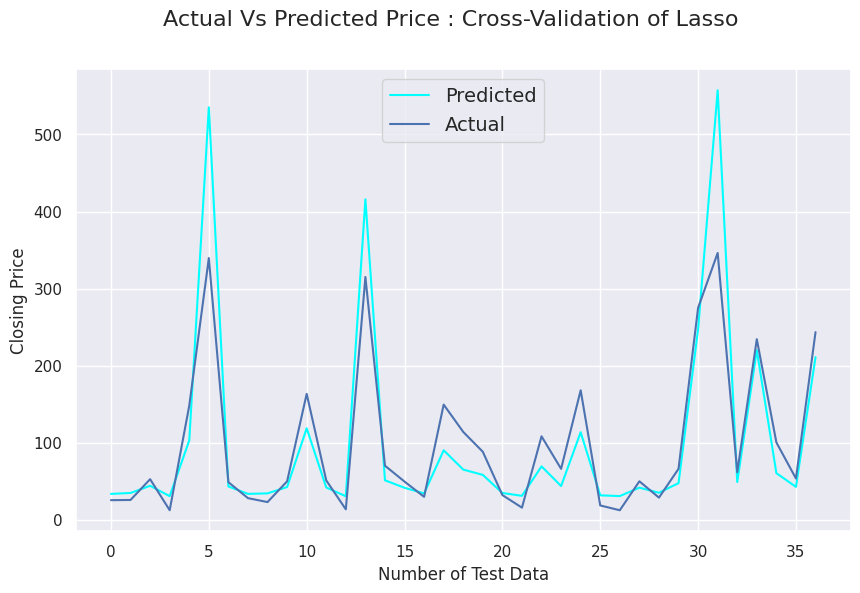

In [94]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1),color='aqua')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used grid search CV to find the optimal parameter as it's best possible way here to identify best parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The R2 score of of Lasso was 0.82 while after cross validation it is 0.82, thus there is no improvement.

### ML Model - 4

###**Elastic Net Regression**

**Elastic Net** is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [95]:
elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [96]:
elastic_reg.score(X_train,y_train)

0.7958095661377872

In [97]:
y_elastic_pred = elastic_reg.predict(X_test)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [98]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_elastic_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_elastic_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_elastic_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_elastic_pred),4))
print("R2 :",round(r2_score(y_test, y_elastic_pred), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


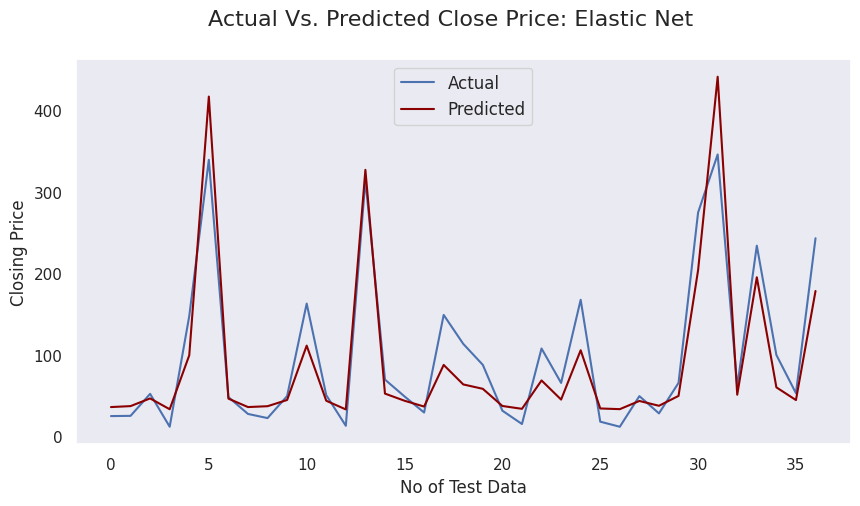

In [99]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred),color='darkred')
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

2. Cross- Validation & Hyperparameter Tuning

In [100]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [101]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [102]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [103]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [104]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


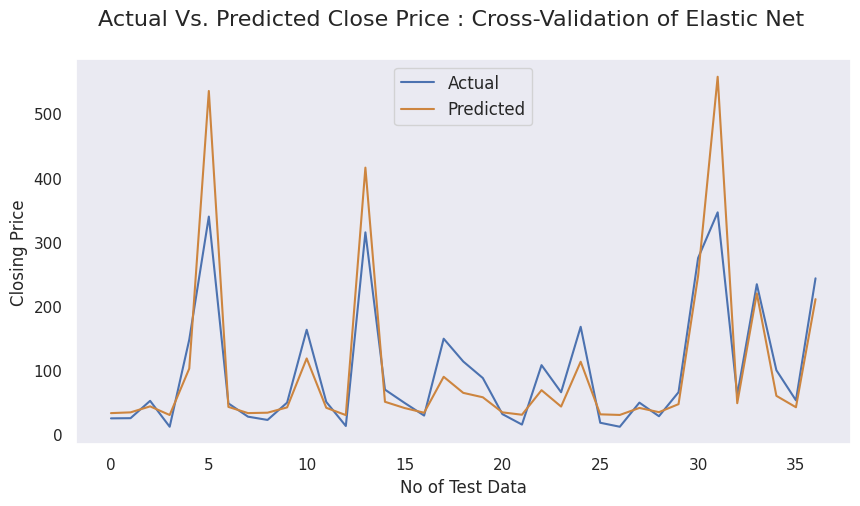

In [105]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1),color='peru')
plt.suptitle('Actual Vs. Predicted Close Price : Cross-Validation of Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

Which hyperparameter optimization technique have you used and why?

Here I have used gridsearchcv, I used it to find the best parameter.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The r2 score of elastic net regressor was 0.7955 while after cross validation it is 0.819, hence it have improved.

### ML Model - 5

###**XG Boost Regression**

XGBoost is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [106]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
xgb.score(X_train,y_train)

0.9999793046487826

In [108]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3392187, 1.4758207, 1.748508 , 1.1662616, 2.1395898, 2.5142817,
       1.6815532, 1.4059161, 1.481916 , 1.7062517, 2.2304559, 1.6739156,
       1.0959644, 2.5049477, 1.8495944, 1.7007504, 1.435145 , 2.1372025,
       2.0201871, 1.9451874, 1.4812558, 1.1896846, 2.0359929, 1.7063808,
       2.2294648, 1.2862344, 1.1662616, 1.7025944, 1.4811883, 1.7835379,
       2.4367232, 2.53591  , 1.8465369, 2.3564181, 1.9621443, 1.7753245,
       2.3714423], dtype=float32)

In [109]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [110]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0019
RMSE : 0.0433
MAE : 0.0314
MAPE : 0.0205
R2 : 0.9894


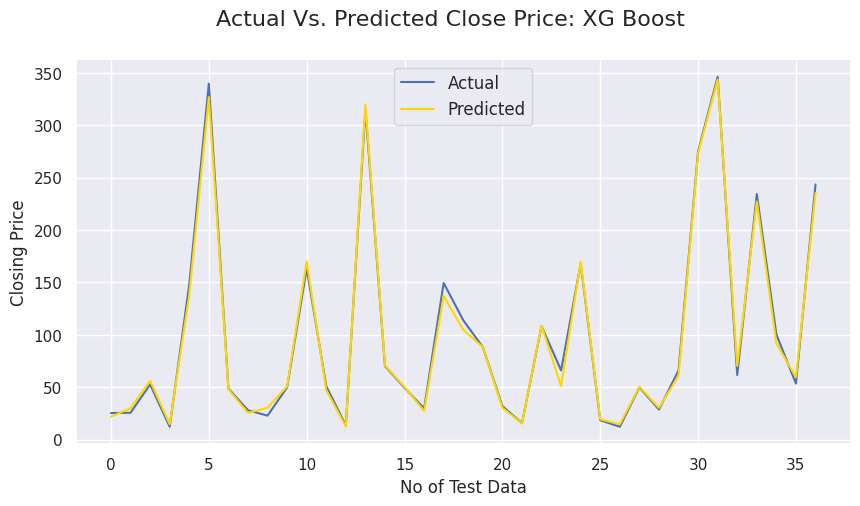

In [111]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG),color='gold')
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

During my analysis, I have given most importance to R2 score. Our target here was to determine the close price as accurately as it can get.

R2 is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data. In simple terms, the better the model is able to accurately predict our dependent variable, the closer it is to 1.

Given our target objective, R2 is best evaluation metric to generate a positive buisness impace as it will help our measure how good our models are doing.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I already have performance data for all models, I am writing a function to test and write all models performance and writing it in one dataframe.

In [112]:
# Function to run all model
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models

    i=0

    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)

        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)


        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)

        i+=1

    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)

    return df


In [113]:
models=[regressor,ridge,lasso1,elastic_reg,xgb]

In [114]:
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
4,XGBRegressor,0.031,0.002,0.043,2.048,0.989
0,LinearRegression,0.151,0.032,0.178,9.543,0.823
1,Ridge,0.152,0.032,0.179,9.580,0.820
2,Lasso,0.152,0.032,0.179,9.623,0.820
3,ElasticNet,0.157,0.036,0.191,10.240,0.796


I am choosing XG boost as my final prediction model. While the other models have also performed well, the R square score of most model were around 0.80-0.85. The R-square score for xg boost is by far the best with 0.989, with both test and training evaulation having similar score(which points that there is no overfitting). If we will look closely on the graph, XG Boost captures the data trend very closely even on around the corners. The other models were failing to catch the trend on the corners which were decreases there score.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. XG boost is simply an open source implementation of gradient boosted trees algorithm, which combines multiple weak learner. The weak learners are multiple regression trees.

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Let's see what we did and what we got in this project in a nutshell.

#What We Did :-
The objective of this project was to predict the stock's closing price of the month and to achieve the objective,
* we started with importing required libraries and load the dataset.
* than performed EDA(exploartory data analysis)
* analyze outliers
* did some data manipulation
* hypothesis testing
* Ml model implementation and record the evaluation metric scores

ML models we used:
* Linear regression
* Ridge, Lasso and ElasticNet for Regularization
* XGboost Regressor


##What We Got :-

###Important Instances & Observations we discovered after analyzing the yes bank's stock price datasets
* Given dataset has neither missing values and nor outliers.

* In year of 2017 and 2018 stock prices were at their peak.
* All time high was 404, it was in 2018.
* All time low was 5.55, it was in 2020.
* From 2016 to 2018, price is increased at high rate.
* After 2018 price is decreased at very high rate.
* In 2019 and 2020 also, price is continuously decreasing.
* All open, high, low and close price has positively skewed distribution.
* All open, high, low and close has strong correlation with eachother.
* All Open , high and low has strong linear relationship with dependent variable.


###Observations while model implementation

* Our first and base model was Linearregression, and got a decent training and testing score of 0.81 and 0.82 respectively with high MSE and MAE metric score.

* Than we implemented Ridge, lasso and ElasticNet regulization models and Lasso model found out as a better model with 0.83 r2-score and MSE and MAE was also very low as compared to base model.

* Than we implemented XGboost Regressor, performing far better than other previous models at every metric.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***